# Arbre-tree 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point,polygon
import contextily as ctx
import missingno as msno
import seaborn as sns

df_csv = pd.read_csv('p2-arbres-fr.csv', delimiter=';')

In [2]:
# J'importe le fichier geojson
df = gpd.read_file('les-arbres.geojson')

In [3]:
df.head()

idbase typeemplacement domanialite   arrondissement complementadresse  \
0  204538           Arbre  Alignement  PARIS 12E ARRDT                23   
1  233243           Arbre  Alignement  PARIS 19E ARRDT              None   
2  108249           Arbre      Jardin  PARIS 16E ARRDT         Canton 03   
3  133954           Arbre      Jardin  PARIS 17E ARRDT              None   
4  139945           Arbre      Jardin  PARIS 19E ARRDT              None   

  numero                                     adresse idemplacement  \
0   None                           AVENUE DU BEL AIR     000103027   
1   None                           RUE DE BELLEVILLE     002901003   
2   None  JARDINS DU TROCADERO / 3 PLACE DE VARSOVIE     000303010   
3   None    SQUARE ERNEST GOUIN / 19 RUE EMILE LEVEL     000103001   
4   None                          JARDIN ILOT RIQUET      00000101   

  libellefrancais          genre       espece varieteoucultivar  \
0          Erable           Acer  platanoides     ''Columnare''   
1         Sophora  Styphnolobium    japonicum              None   
2              If          Taxus      baccata         ''Lutea''   
3         Tilleul          Tilia   x europaea       ''Pallida''   
4          Charme       Carpinus      betulus              None   

   circonferenceencm  hauteurenm   stadedeveloppement remarquable  \
0                 20           5        Jeune (arbre)         NON   
1                120          15               Adulte         NON   
2                 52           3               Adulte         NON   
3                 65           7  Jeune (arbre)Adulte         NON   
4                 85           9               Adulte         NON   

                   geometry  
0  POINT (2.39702 48.84681)  
1  POINT (2.40119 48.87590)  
2  POINT (2.28903 48.86010)  
3  POINT (2.31786 48.89408)  
4  POINT (2.37540 48.89040)

In [4]:
df.info()    

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 208904 entries, 0 to 208903
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   idbase              208904 non-null  int64   
 1   typeemplacement     208904 non-null  object  
 2   domanialite         208904 non-null  object  
 3   arrondissement      208904 non-null  object  
 4   complementadresse   60337 non-null   object  
 5   numero              0 non-null       object  
 6   adresse             208904 non-null  object  
 7   idemplacement       208904 non-null  object  
 8   libellefrancais     195921 non-null  object  
 9   genre               208902 non-null  object  
 10  espece              206285 non-null  object  
 11  varieteoucultivar   40070 non-null   object  
 12  circonferenceencm   208904 non-null  int64   
 13  hauteurenm          208904 non-null  int64   
 14  stadedeveloppement  161831 non-null  object  
 15  remarquab

In [5]:
df.shape

(208904, 17)

In [6]:
df.describe(include='all')

idbase typeemplacement domanialite   arrondissement  \
count   2.089040e+05          208904      208904           208904   
unique           NaN               1           9               25   
top              NaN           Arbre  Alignement  PARIS 15E ARRDT   
freq             NaN          208904      107331            17650   
mean    5.016561e+05             NaN         NaN              NaN   
std     6.711236e+05             NaN         NaN              NaN   
min     9.987400e+04             NaN         NaN              NaN   
25%     1.609198e+05             NaN         NaN              NaN   
50%     2.305115e+05             NaN         NaN              NaN   
75%     2.859412e+05             NaN         NaN              NaN   
max     2.043107e+06             NaN         NaN              NaN   

       complementadresse numero                                      adresse  \
count              60337      0                                       208904   
unique              5177      0                                         7442   
top                    2    NaN  PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE   
freq                 840    NaN                                         2961   
mean                 NaN    NaN                                          NaN   
std                  NaN    NaN                                          NaN   
min                  NaN    NaN                                          NaN   
25%                  NaN    NaN                                          NaN   
50%                  NaN    NaN                                          NaN   
75%                  NaN    NaN                                          NaN   
max                  NaN    NaN                                          NaN   

       idemplacement libellefrancais     genre       espece varieteoucultivar  \
count         208904          195921    208902       206285             40070   
unique         63970             202       185          571               524   
top        000101001         Platane  Platanus  x hispanica     ''Baumannii''   
freq            2316           42314     42570        37145              4814   
mean             NaN             NaN       NaN          NaN               NaN   
std              NaN             NaN       NaN          NaN               NaN   
min              NaN             NaN       NaN          NaN               NaN   
25%              NaN             NaN       NaN          NaN               NaN   
50%              NaN             NaN       NaN          NaN               NaN   
75%              NaN             NaN       NaN          NaN               NaN   
max              NaN             NaN       NaN          NaN               NaN   

        circonferenceencm     hauteurenm stadedeveloppement remarquable  \
count       208904.000000  208904.000000             161831      187311   
unique                NaN            NaN                  4           2   
top                   NaN            NaN             Adulte         NON   
freq                  NaN            NaN              78545      187124   
mean            80.894550       8.814958                NaN         NaN   
std             63.001688       5.934766                NaN         NaN   
min              0.000000       0.000000                NaN         NaN   
25%             30.000000       5.000000                NaN         NaN   
50%             70.000000       8.000000                NaN         NaN   
75%            115.000000      12.000000                NaN         NaN   
max           2015.000000     170.000000                NaN         NaN   

                                           geometry  
count                                        208904  
unique                                       208810  
top     POINT (2.361824759598679 48.82732751870307)  
freq                                              2  
mean                                            NaN  
std                       

<Axes: >

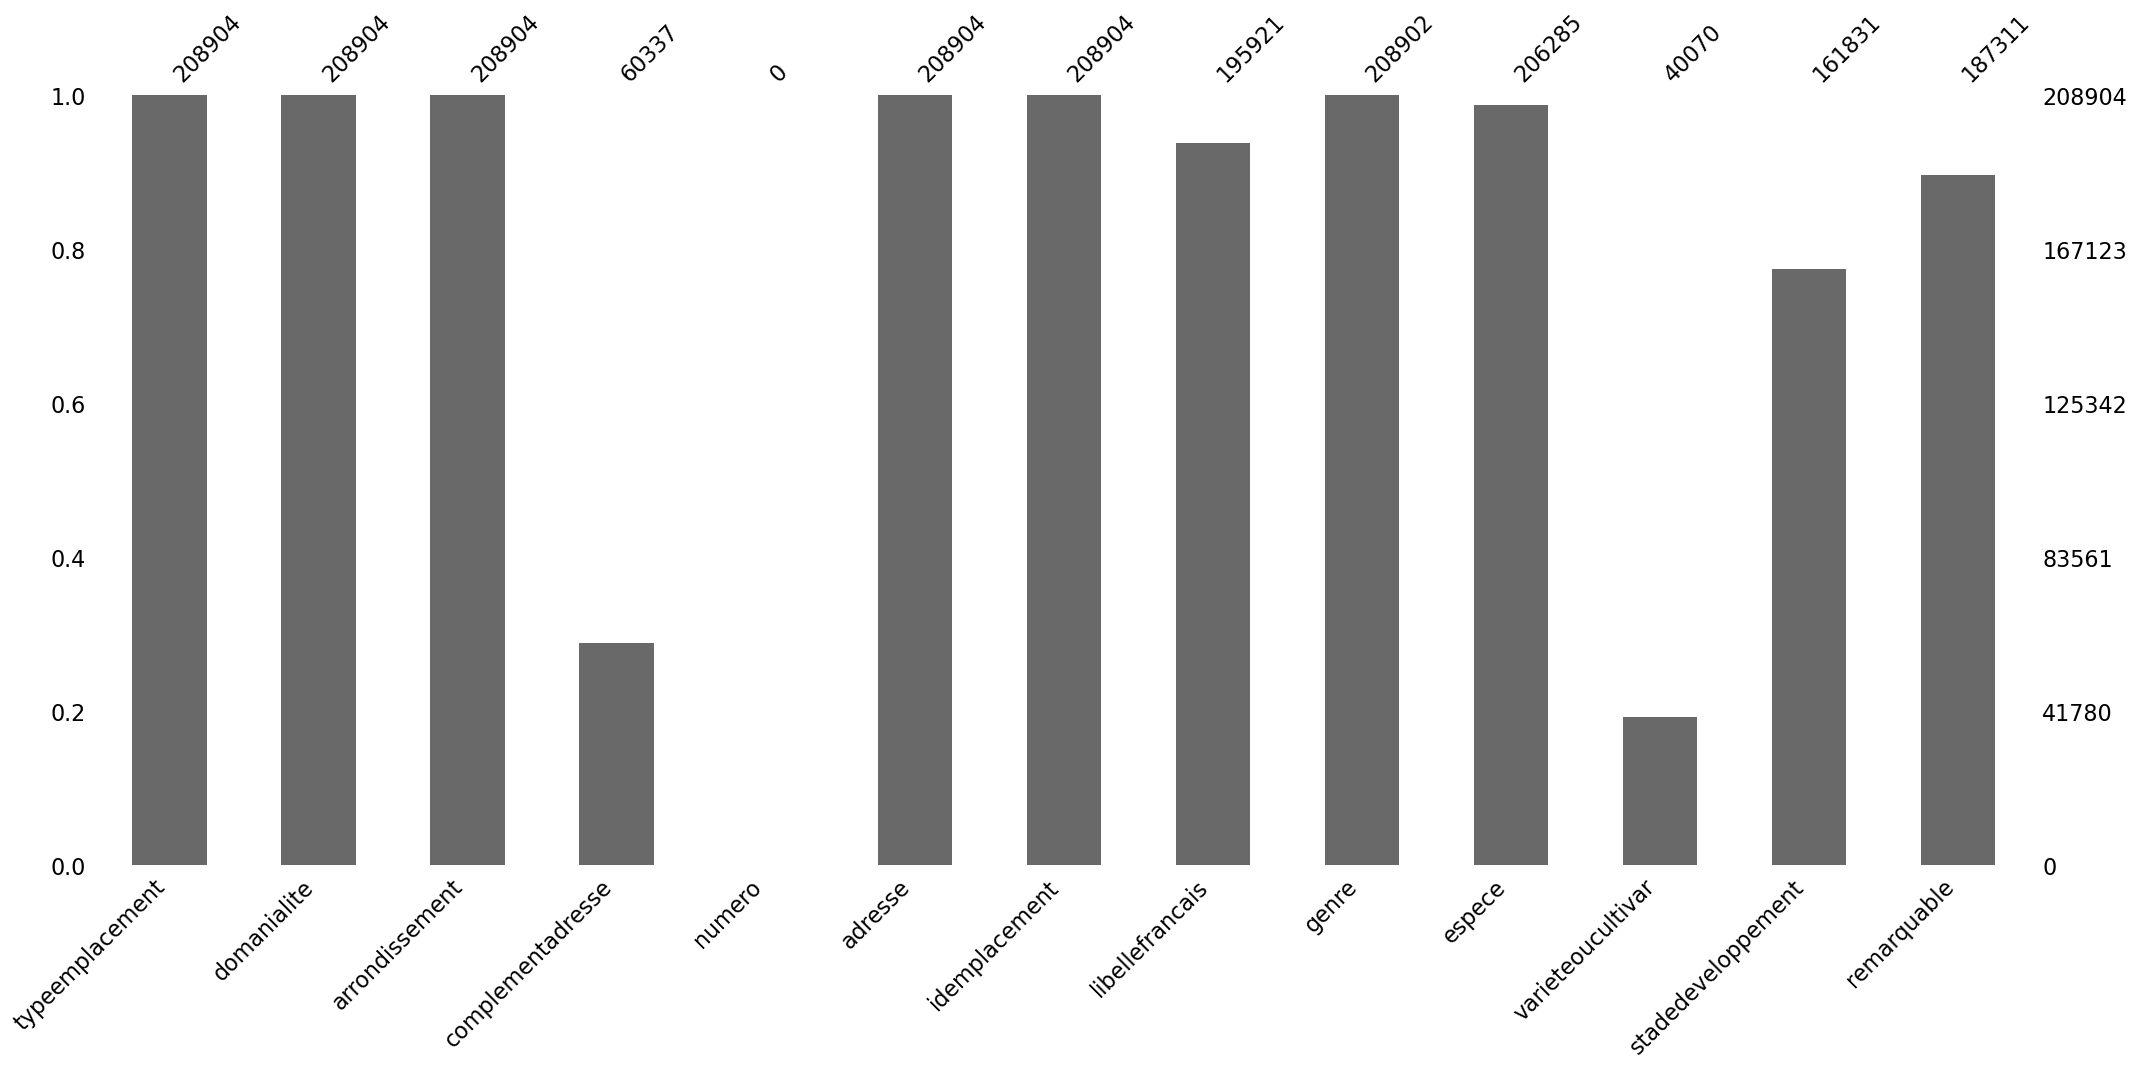

In [7]:
msno.bar(df.select_dtypes('object'))

In [8]:
# Création d'une boucle qui va afficher le nom de la colonne, le nombre de valeurs manquantes
# les valeurs uniques ainsi que leur nombre
for col in df.select_dtypes('object'):
    print("_____",col) 
    print("nbr_nan:",df[col].isna().sum())
    print(df[col].nunique(),"valeurs uniques")
    print(df[col].unique()[:10])
    print("_ _ _ _ _ _ _ _ _ _") 
    print("_ _ _ _ _ _ _ _ _ _") 

_____ typeemplacement
nbr_nan: 0
1 valeurs uniques
['Arbre']
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ domanialite
nbr_nan: 0
9 valeurs uniques
['Alignement' 'Jardin' 'CIMETIERE' 'DASCO' 'PERIPHERIQUE' 'DJS' 'DFPE'
 'DAC' 'DASES']
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ arrondissement
nbr_nan: 0
25 valeurs uniques
['PARIS 12E ARRDT' 'PARIS 19E ARRDT' 'PARIS 16E ARRDT' 'PARIS 17E ARRDT'
 'PARIS 20E ARRDT' 'BOIS DE VINCENNES' 'PARIS 14E ARRDT'
 'BOIS DE BOULOGNE' 'PARIS 15E ARRDT' 'SEINE-SAINT-DENIS']
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ complementadresse
nbr_nan: 148567
5177 valeurs uniques
['23' None 'Canton 03' '203' '268' '6' 'TOURNELLES / VOSGES' '2' '266'
 'F119']
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ numero
nbr_nan: 208904
0 valeurs uniques
[None]
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ adresse
nbr_nan: 0
7442 valeurs uniques
['AVENUE DU BEL AIR' 'RUE DE BELLEVILLE'
 'JARDINS DU TROCADERO / 3 PLACE DE VARSOVIE'
 'SQUARE ERNEST GOUIN / 19 RUE EMILE 

**Premières observations**  

**Variables qualitatives**:  

* La colonne **'type_emplacement'** ne contient qu'une valeur **'arbre'**
* La colonne domanialite correspond aux types d'espaces publics :
    * Jardin : espace vert, parc
    *  Alignement : espaces le long des rues
    *  DJS : Equipements sportifs
    *  DFPE : Crèches
    *  Cimetiere : cimetière
    *  
DASC : 	Ecole
    *  *DAC	Equipements cultuels
 : ASES	Action so
* La colonne arrondissement comprend tous les arrondissements (1er au 20eme ainsi que le bois de Boulogne, le bois de Vincennes, les Hauts-de-Seine, le Val de Marne et la Seine-Saint-Denis.
* La colonne **complément d'adresse** contient beaucoup de valeurs manquantes.
* Les colonnes **lieu, id_emplacement** ne contiennent pas de valeurs manquantes et désignent un lieu.
* La colonne **libelle_francais** affiche le nom de l'arbre en français. Elle comprend 192 types et 1497 valeurs manquantes.
* Les colonnes **genre, espece et variété** donnent plus d'informations sur le type d'arbre. Elles correspondent à trois niveaux de classification des plantes.
* La colonne **stade_developpement** indique les différents stades de développement des arbres (4 valeurs 

<Axes: >

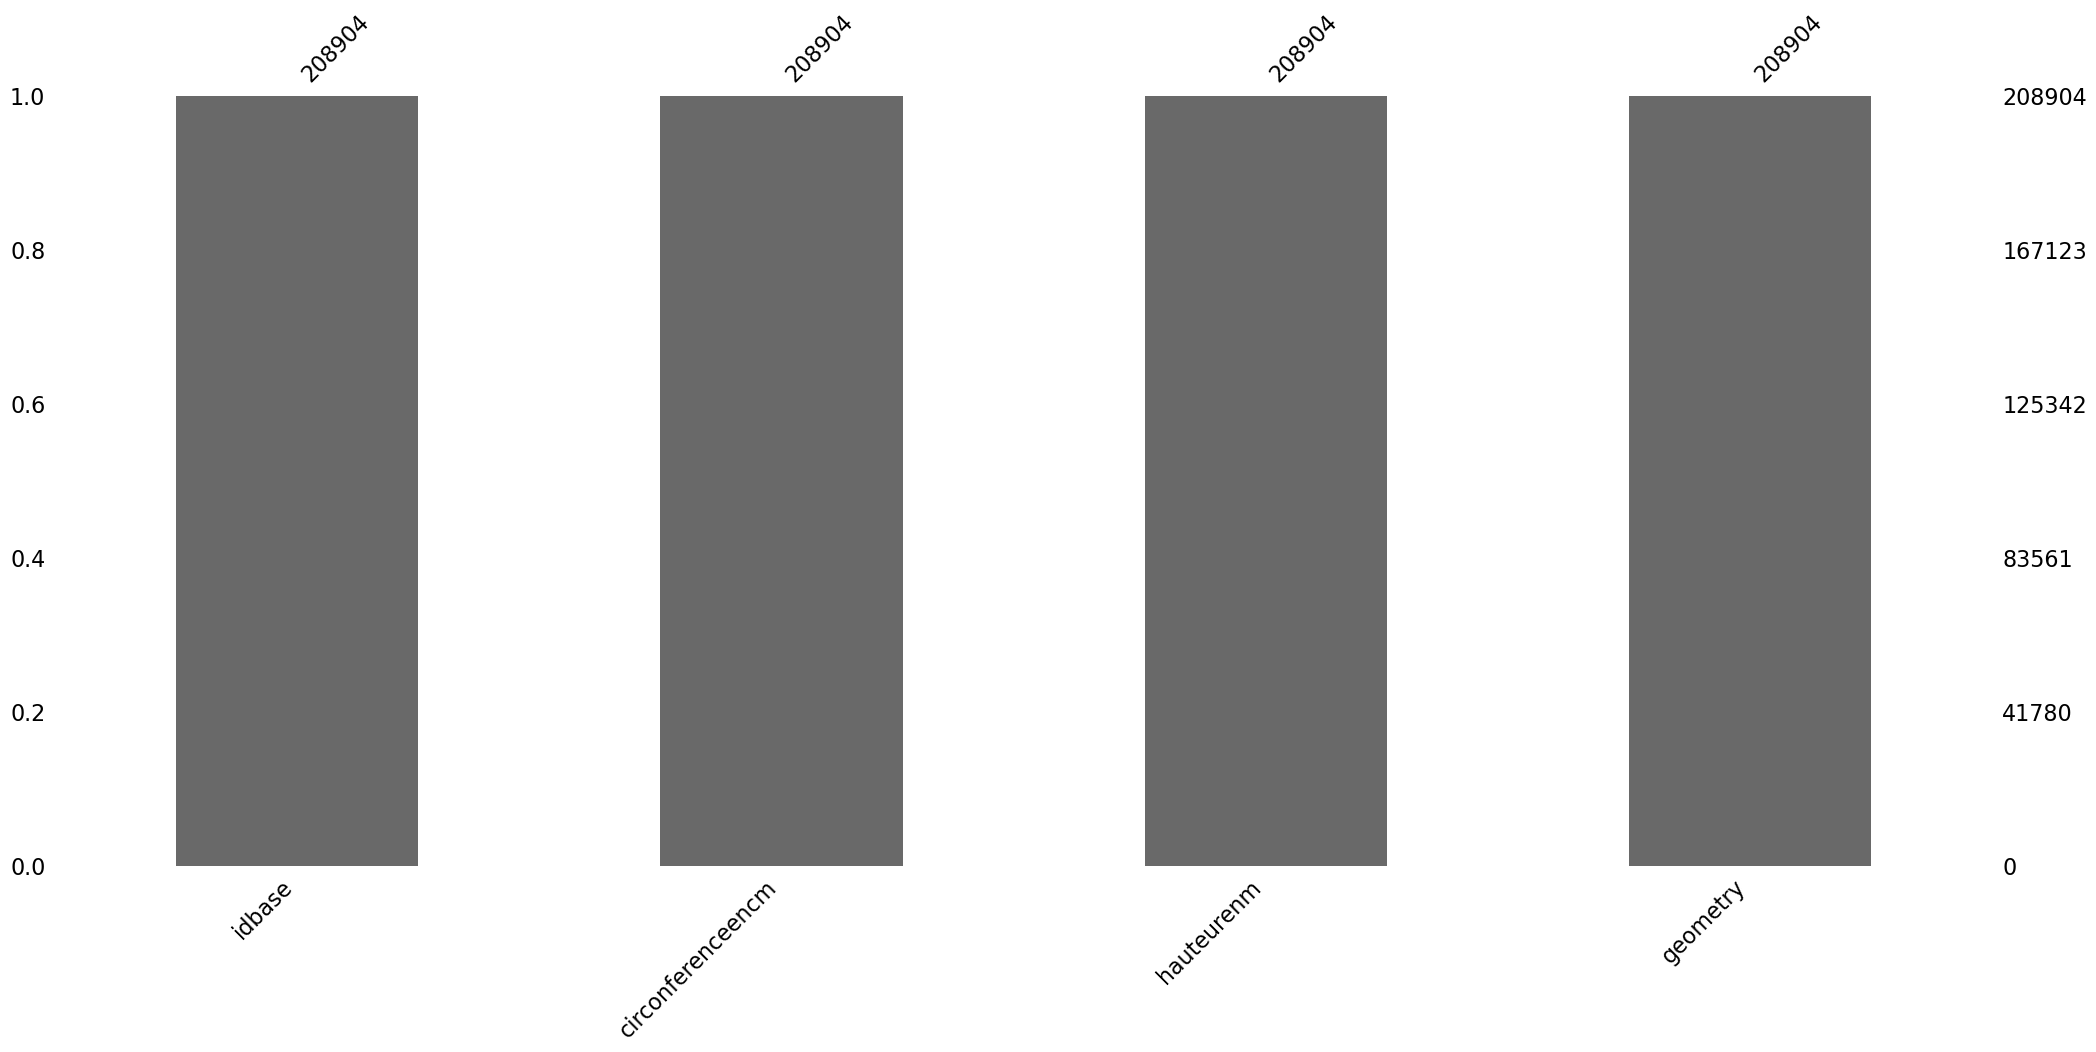

In [9]:
msno.bar(df.select_dtypes(exclude='object'))

In [10]:
for col in df.select_dtypes(exclude='object'):
    print("_____",col) 
    print("Nombre de doublons:",df[col].duplicated().sum())
    print("nbr_nan:",df[col].isna().sum())
    print(df[col].nunique(),"valeurs uniques")
    print(df[col].unique()[:10])
    print("_ _ _ _ _ _ _ _ _ _") 
    print("_ _ _ _ _ _ _ _ _ _") 

_____ idbase
Nombre de doublons: 2
nbr_nan: 0
208902 valeurs uniques
[204538 233243 108249 133954 139945 146765 189685 196887 202033 266747]
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ circonferenceencm
Nombre de doublons: 208446
nbr_nan: 0
458 valeurs uniques
[ 20 120  52  65  85 100 145  60 116  40]
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ hauteurenm
Nombre de doublons: 208856
nbr_nan: 0
48 valeurs uniques
[ 5 15  3  7  9  8  4 19 10 12]
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ geometry
Nombre de doublons: 94
nbr_nan: 0
208810 valeurs uniques
<GeometryArray>
[ <POINT (2.4 48.8)>,  <POINT (2.4 48.9)>, <POINT (2.29 48.9)>,
 <POINT (2.32 48.9)>, <POINT (2.38 48.9)>, <POINT (2.32 48.9)>,
 <POINT (2.39 48.9)>, <POINT (2.28 48.9)>, <POINT (2.46 48.8)>,
 <POINT (2.28 48.9)>]
Length: 10, dtype: geometry
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _


**Variables quantitatives :**  

* La colonne id correspond à l'id de l'arbre et semble contenir 2 doublons.
* La colonne **numero** est **vide**.
* Les colonnes **circonference_cm et hauteur** donne des informations sur la taille de l'arbre et ne contiennent pas de valeurs manquantes.
* La colonne **remarquable** indique quel arbre est dit *remarquable* (Un arbre remarquable est un arbre qui est considéré comme exceptionnel en raison de ses caractéristiques particulières, de son âge, de sa taille, de sa rareté, de son histoire ou de son importance écologique, culturelle ou historique). Elle comprend 63098 valeurs manquantes.
* La colonne geometry indique la présence de 94 doublons (il ne peut pas y avoir 2 arbres à les mêmes coordonnées).
* Les deux dernières colonnes sont des données spatiales qui vont me permettrent d'afficher mes données via Geopandas.

<Axes: >

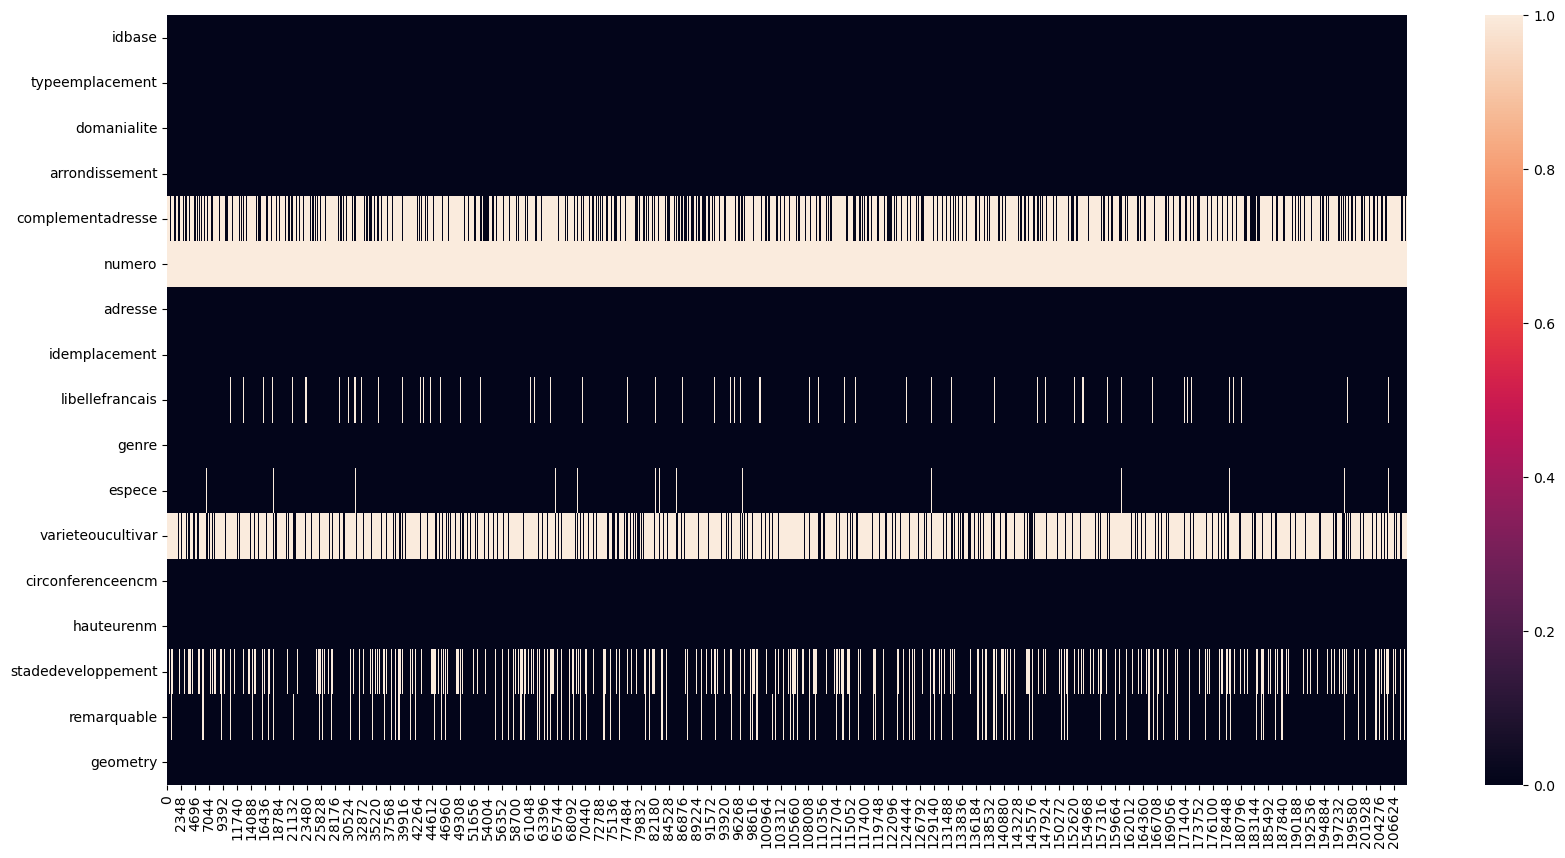

In [11]:
# J'affiche mon dataset sous forme de heatmap pour voir l'ensemble de mes valeurs manquantes
plt.figure(figsize=(20,10))
sns.heatmap(df.isna().T)


## Doublons

Le moyen le plus simple pour vérifier s'il s'agit de vrais doublons serait de voir la colonne 'geometry' afin de voir si les emplacements longitude/latitude sont identiques. 

In [12]:
duplicated_indices = []

# Parcourir chaque colonne sauf 'geometry'
for column in ['idbase', 'geometry']:
    # Trouver les doublons pour la colonne actuelle
    duplicated_coord = df[df.duplicated(subset=[column], keep=False)]
    
    # Regrouper les doublons par la colonne actuelle
    duplicated_groups = duplicated_coord.groupby([column])
    
    # Collecter les index des groupes de doublons
    indices_groups = [group.index.tolist() for _, group in duplicated_groups]
    
    # Parcourir les groupes de doublons
    for indices in indices_groups:
        # Afficher les lignes en utilisant les index
        for j in range(len(df.iloc[indices[0], :])):
            print(str(df.iloc[indices[0], j]) + ' ' * (30 - len(str(df.iloc[indices[0], j]))) + '| ' + str(df.iloc[indices[1], j]))
        print("-" * 60)

227160                        | 227160
Arbre                         | Arbre
Alignement                    | Alignement
PARIS 6E ARRDT                | PARIS 6E ARRDT
None                          | None
None                          | None
PORT DES SAINTS PERES / QUAI MALAQUAIS| PORT DES SAINTS PERES / QUAI MALAQUAIS
000201008                     | 000201008
Peuplier                      | Peuplier
Populus                       | Populus
alba                          | alba
''Raket''                     | ''Raket''
165                           | 20
15                            | 5
None                          | Jeune (arbre)
NON                           | NON
POINT (2.334441419957628 48.85831741176347)| POINT (2.334441419957628 48.85831741176347)
------------------------------------------------------------
2009124                       | 2009124
Arbre                         | Arbre
Alignement                    | Alignement
PARIS 4E ARRDT                | PARIS 4E ARRDT
None     

Il y a 3 types de doublons :  
* similaires (contiennent les mêmes informations)
* évolutif (le même arbre mais avec de nouvelles mesures)
* erreur de saisie (deux entrées pour un même arbre avec une ligne dont les valeurs sont à 0.)

In [13]:
duplicates = df[df.duplicated(subset=['geometry'], keep=False)]
duplicates_sorted = duplicates.sort_values(['geometry', 'stadedeveloppement'])
result_df = duplicates_sorted.drop_duplicates(subset=['geometry'], keep='first')
result_df

idbase typeemplacement domanialite     arrondissement  \
178290  2037381           Arbre      Jardin    PARIS 13E ARRDT   
129865  2042784           Arbre  Alignement    PARIS 13E ARRDT   
61751   2042702           Arbre  Alignement    PARIS 13E ARRDT   
131426  2042695           Arbre  Alignement    PARIS 13E ARRDT   
69579   2042782           Arbre  Alignement    PARIS 13E ARRDT   
...         ...             ...         ...                ...   
101195  2027851           Arbre  Alignement    PARIS 19E ARRDT   
4638    2015795           Arbre      Jardin  BOIS DE VINCENNES   
74787   2010609           Arbre      Jardin  BOIS DE VINCENNES   
31645    235152           Arbre  Alignement    PARIS 11E ARRDT   
81788   2011523           Arbre      Jardin  BOIS DE VINCENNES   

       complementadresse numero  \
178290         Le bassin   None   
129865               -16   None   
61751                -16   None   
131426                -2   None   
69579                -16   None   
...                  ...    ...   
101195              None   None   
4638                None   None   
74787               None   None   
31645               None   None   
81788               None   None   

                                                  adresse idemplacement  \
178290  PARC KELLERMANN / 19 RUE DE LA POTERNE DES PEU...     000902011   
129865                              RUE DU DOCTEUR MAGNAN     000202003   
61751                               RUE DU DOCTEUR MAGNAN     000202002   
131426                              RUE DU DOCTEUR MAGNAN     000101001   
69579                               RUE DU DOCTEUR MAGNAN     000202001   
...                                                   ...           ...   
101195           JARDINIERES DU QUAI DU LOT / QUAI DU LOT     000107001   
4638          PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE      03120004   
74787         PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE      00020023   
31645                               AVENUE DE TAILLEBOURG     000103011   
81788         PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE      00190042   

       libellefrancais         genre       espece  varieteoucultivar  \
178290            None  Non spécifié       n. sp.               None   
129865        Magnolia      Magnolia  grandiflora  ''Galissonnière''   
61751          Alisier        Sorbus   torminalis               None   
131426        Magnolia      Magnolia  grandiflora  ''Galissonnière''   
69579          Alisier        Sorbus   torminalis               None   
...                ...           ...          ...                ...   
101195        Peuplier       Populus        nigra               None   
4638              None        Prunus       n. sp.               None   
74787          Platane      Platanus  x hispanica               None   
31645             None         Tilia       n. sp.               None   
81788         Peuplier       Populus        nigra        ''Italica''   

        circonferenceencm  hauteurenm   stadedeveloppement remarquable  \
178290                 80          14               Adulte         NON   
129865                 20           4        Jeune (arbre)         NON   
61751                  20           4        Jeune (arbre)         NON   
131426                 20           4        Jeune (arbre)         NON   
69579                  20           4        Jeune (arbre)         NON   
...                   ...         ...                  ...         ...   
101195                 30           4        Jeune (arbre)         NON   
4638                    0           0                 None         NON   
74787                 190          24               Adulte         NON   
31645                  55           5  Jeune (arbre)Adulte         NON   
81788                 100          22               Adulte         NON   

                        geometry  
178290  POINT (2.35509 48.81831)  
129865  POINT (2.36182 48.82733)  
61751   POINT (2.36189 48.82736)  


In [14]:
# Supprimer les doublons du DataFrame principal
df_sans_duplication = df.drop_duplicates(subset=['geometry'], keep=False)

# Sélectionner les doublons
duplicates = df_sans_duplication[df_sans_duplication.duplicated(subset=['geometry'], keep=False)]

# Trier les doublons par 'geometry' et 'stadedeveloppement'
duplicates_sorted = duplicates.sort_values(['geometry', 'stadedeveloppement'])

# Conserver uniquement la première occurrence de chaque doublon basé sur 'geometry'
result_df = duplicates_sorted.drop_duplicates(subset=['geometry'], keep='first')

# Concaténer les lignes au DataFrame principal
df_final = pd.concat([df_sans_duplication, result_df], ignore_index=True)

# Afficher le DataFrame résultant
df_final


idbase typeemplacement domanialite   arrondissement complementadresse  \
0       204538           Arbre  Alignement  PARIS 12E ARRDT                23   
1       233243           Arbre  Alignement  PARIS 19E ARRDT              None   
2       108249           Arbre      Jardin  PARIS 16E ARRDT         Canton 03   
3       133954           Arbre      Jardin  PARIS 17E ARRDT              None   
4       139945           Arbre      Jardin  PARIS 19E ARRDT              None   
...        ...             ...         ...              ...               ...   
208711  184910           Arbre       DASCO  PARIS 18E ARRDT              None   
208712  249117           Arbre  Alignement  PARIS 20E ARRDT                 7   
208713  265767           Arbre  Alignement  PARIS 15E ARRDT             N°103   
208714  277158           Arbre  Alignement   PARIS 7E ARRDT                14   
208715  292637           Arbre  Alignement  PARIS 18E ARRDT                17   

       numero                                        adresse idemplacement  \
0        None                              AVENUE DU BEL AIR     000103027   
1        None                              RUE DE BELLEVILLE     002901003   
2        None     JARDINS DU TROCADERO / 3 PLACE DE VARSOVIE     000303010   
3        None       SQUARE ERNEST GOUIN / 19 RUE EMILE LEVEL     000103001   
4        None                             JARDIN ILOT RIQUET      00000101   
...       ...                                            ...           ...   
208711   None  ECOLE ELEMENTAIRE / 8 PLACE FRANCOISE DORLEAC     000101018   
208712   None                                    RUE SORBIER     000103009   
208713   None                              AVENUE EMILE ZOLA     001101015   
208714   None                         AVENUE EMILE DESCHANEL     000602009   
208715   None                                    RUE CUSTINE     000101024   

       libellefrancais          genre       espece varieteoucultivar  \
0               Erable           Acer  platanoides     ''Columnare''   
1              Sophora  Styphnolobium    japonicum              None   
2                   If          Taxus      baccata         ''Lutea''   
3              Tilleul          Tilia   x europaea       ''Pallida''   
4               Charme       Carpinus      betulus              None   
...                ...            ...          ...               ...   
208711            None          Tilia       n. sp.              None   
208712         Tilleul          Tilia      cordata              None   
208713         Sophora  Styphnolobium    japonicum              None   
208714      Marronnier       Aesculus     x carnea       ''Briotii''   
208715         Tilleul          Tilia    tomentosa              None   

        circonferenceencm  hauteurenm   stadedeveloppement remarquable  \
0                      20           5        Jeune (arbre)         NON   
1                     120          15               Adulte         NON   
2                      52           3               Adulte         NON   
3                      65           7  Jeune (arbre)Adulte         NON   
4                      85           9               Adulte         NON   
...                   ...         ...                  ...         ...   
208711                100          15               Adulte         NON   
208712                120          15               Adulte         NON   
208713                150          12               Adulte         NON   
208714                 45           6        Jeune (arbre)         NON   
208715                 58           6        Jeune (arbre)         NON   

                        geometry  
0       POINT (2.39702 48.84681)  
1       POINT (2.40119 48.87590)  
2       POINT (2.28903 48.86010)  
3       POINT (2.31786 48.89408)  
4       POINT (2.37540 48.89040)  
...                          ...  
208711  POINT (2.33838 48.90023)  
208712  POINT (2.39017 48.86821)  
208713  POINT (2.29043 48.846

# Traitement des valeurs manquantes

In [15]:
#Je retire les colonnes numero, typeemplacement, complementadresse

df = df_final.drop(['numero','typeemplacement', 'complementadresse'],axis=1)

In [16]:
df.head()

idbase domanialite   arrondissement  \
0  204538  Alignement  PARIS 12E ARRDT   
1  233243  Alignement  PARIS 19E ARRDT   
2  108249      Jardin  PARIS 16E ARRDT   
3  133954      Jardin  PARIS 17E ARRDT   
4  139945      Jardin  PARIS 19E ARRDT   

                                      adresse idemplacement libellefrancais  \
0                           AVENUE DU BEL AIR     000103027          Erable   
1                           RUE DE BELLEVILLE     002901003         Sophora   
2  JARDINS DU TROCADERO / 3 PLACE DE VARSOVIE     000303010              If   
3    SQUARE ERNEST GOUIN / 19 RUE EMILE LEVEL     000103001         Tilleul   
4                          JARDIN ILOT RIQUET      00000101          Charme   

           genre       espece varieteoucultivar  circonferenceencm  \
0           Acer  platanoides     ''Columnare''                 20   
1  Styphnolobium    japonicum              None                120   
2          Taxus      baccata         ''Lutea''                 52   
3          Tilia   x europaea       ''Pallida''                 65   
4       Carpinus      betulus              None                 85   

   hauteurenm   stadedeveloppement remarquable                  geometry  
0           5        Jeune (arbre)         NON  POINT (2.39702 48.84681)  
1          15               Adulte         NON  POINT (2.40119 48.87590)  
2           3               Adulte         NON  POINT (2.28903 48.86010)  
3           7  Jeune (arbre)Adulte         NON  POINT (2.31786 48.89408)  
4           9               Adulte         NON  POINT (2.37540 48.89040)

In [17]:
df.columns

Index(['idbase', 'domanialite', 'arrondissement', 'adresse', 'idemplacement',
       'libellefrancais', 'genre', 'espece', 'varieteoucultivar',
       'circonferenceencm', 'hauteurenm', 'stadedeveloppement', 'remarquable',
       'geometry'],
      dtype='object')

## Colonnes libellefrancais', 'genre', 'espece', 'varieteoucultivar'

<Axes: >

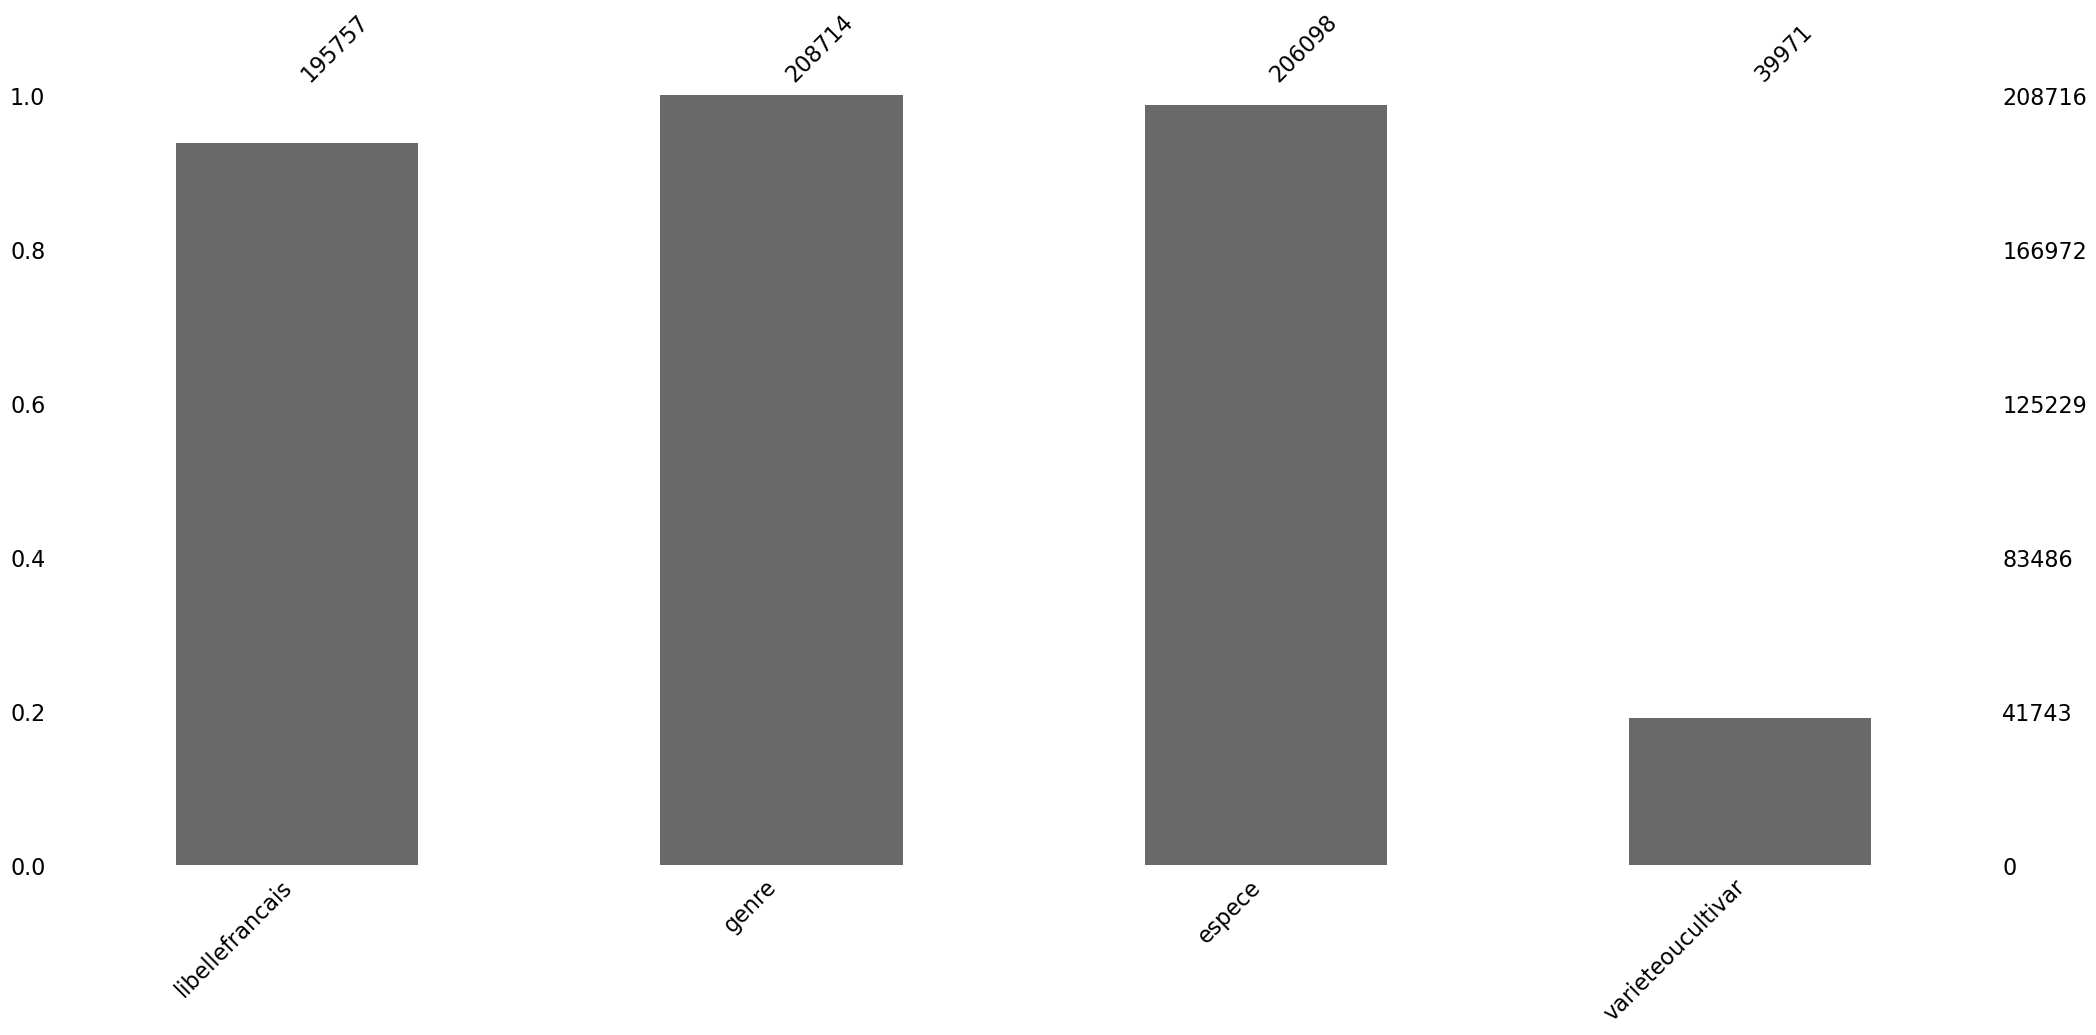

In [18]:
msno.bar(df[['libellefrancais', 'genre', 'espece', 'varieteoucultivar']])

In [19]:
# Je commence par supprimer les lignes pour lesquelles nous n'avons pas d'informations sur l'arbre (type, genre..)
to_drop = df.loc[(df['libellefrancais'].isna()) & (df['genre'].str.contains('Non spécifié')) & (df['espece'].str.contains('n. sp.'))|(df['espece'].isna()),:].index

# Utilisez la méthode drop pour supprimer ces lignes
df = df.drop(to_drop)


In [20]:
df.loc[df['libellefrancais'].isna()][['libellefrancais', 'genre', 'espece']].head()

libellefrancais  genre      espece
37            None   Acer      n. sp.
47            None  Tilia  x europaea
52            None  Malus      n. sp.
84            None  Malus      n. sp.
87            None  Tilia      n. sp.

In [21]:
# Supposons que vos colonnes soient 'libellefrancais' et 'genre'
colonne1 = df['libellefrancais'].dropna()
colonne2 = df['genre'].dropna()

# Créer un dictionnaire à partir des deux colonnes
dictionnaire_arbre = dict(zip(colonne1, colonne2))


In [22]:
dictionnaire_arbre

{'Erable': 'Tilia',
 'Sophora': 'Aesculus',
 'If': 'Aesculus',
 'Tilleul': 'Prunus',
 'Charme': 'Platanus',
 'Marronnier': 'Platanus',
 'Robinier': 'Zelkova',
 'Chêne': 'Prunus',
 'Platane': 'Tilia',
 'Hêtre': 'Platanus',
 'Cerisier à grappes': 'Platanus',
 'Pin': 'Acer',
 'Noisetier de Byzance': 'Betula',
 'Pommier à fruits': 'Platanus',
 'Phellodendron': 'Pinus',
 'Orme de Sibérie': 'Tilia',
 'Aulne': 'Acer',
 'Micocoulier': 'Tilia',
 'Arbre aux quarante écus': 'Celtis',
 'Fevier': 'Ginkgo',
 'Cedrele': 'Carpinus',
 'Pterocarya': 'Platanus',
 'Tulipier': 'Ostrya',
 'Frêne': 'Platanus',
 'Cerisier à fleurs': 'Platanus',
 'Cyprès': 'Platanus',
 'Peuplier': 'Aesculus',
 'Arbre de Judée': 'Robinia',
 'Copalme': 'Platanus',
 'Libocèdre': 'Tilia',
 'Bouleau': 'Styphnolobium',
 'Cornouiller': 'Corylus',
 'Paulownia': 'Acer',
 'Noyer': 'Magnolia',
 'Savonnier': 'Pyrus',
 'Châtaignier': 'Aesculus',
 'Arbre à caramel': 'Celtis',
 'Epicéa': 'Pinus',
 'Charme-Houblon': 'Styphnolobium',
 'Magnoli

In [23]:
replace_missing = lambda row: dictionnaire_arbre.get(row['libellefrancais'], row['genre'])

# Appliquez la fonction lambda avec apply pour remplacer les valeurs manquantes
df['libellefrancais'] = df.apply(lambda row: row['libellefrancais'] if pd.notna(row['libellefrancais']) else replace_missing(row), axis=1)

# Remplacez les valeurs manquantes dans 'genre' uniquement si 'libellefrancais' est manquant
df['genre'] = df.apply(lambda row: row['genre'] if pd.notna(row['libellefrancais']) else dictionnaire_arbre.get(row['libellefrancais'], row['genre']), axis=1)

# Affichez le DataFrame pour vérification
df.head()

idbase domanialite   arrondissement  \
0  204538  Alignement  PARIS 12E ARRDT   
1  233243  Alignement  PARIS 19E ARRDT   
2  108249      Jardin  PARIS 16E ARRDT   
3  133954      Jardin  PARIS 17E ARRDT   
4  139945      Jardin  PARIS 19E ARRDT   

                                      adresse idemplacement libellefrancais  \
0                           AVENUE DU BEL AIR     000103027          Erable   
1                           RUE DE BELLEVILLE     002901003         Sophora   
2  JARDINS DU TROCADERO / 3 PLACE DE VARSOVIE     000303010              If   
3    SQUARE ERNEST GOUIN / 19 RUE EMILE LEVEL     000103001         Tilleul   
4                          JARDIN ILOT RIQUET      00000101          Charme   

           genre       espece varieteoucultivar  circonferenceencm  \
0           Acer  platanoides     ''Columnare''                 20   
1  Styphnolobium    japonicum              None                120   
2          Taxus      baccata         ''Lutea''                 52   
3          Tilia   x europaea       ''Pallida''                 65   
4       Carpinus      betulus              None                 85   

   hauteurenm   stadedeveloppement remarquable                  geometry  
0           5        Jeune (arbre)         NON  POINT (2.39702 48.84681)  
1          15               Adulte         NON  POINT (2.40119 48.87590)  
2           3               Adulte         NON  POINT (2.28903 48.86010)  
3           7  Jeune (arbre)Adulte         NON  POINT (2.31786 48.89408)  
4           9               Adulte         NON  POINT (2.37540 48.89040)

<Axes: >

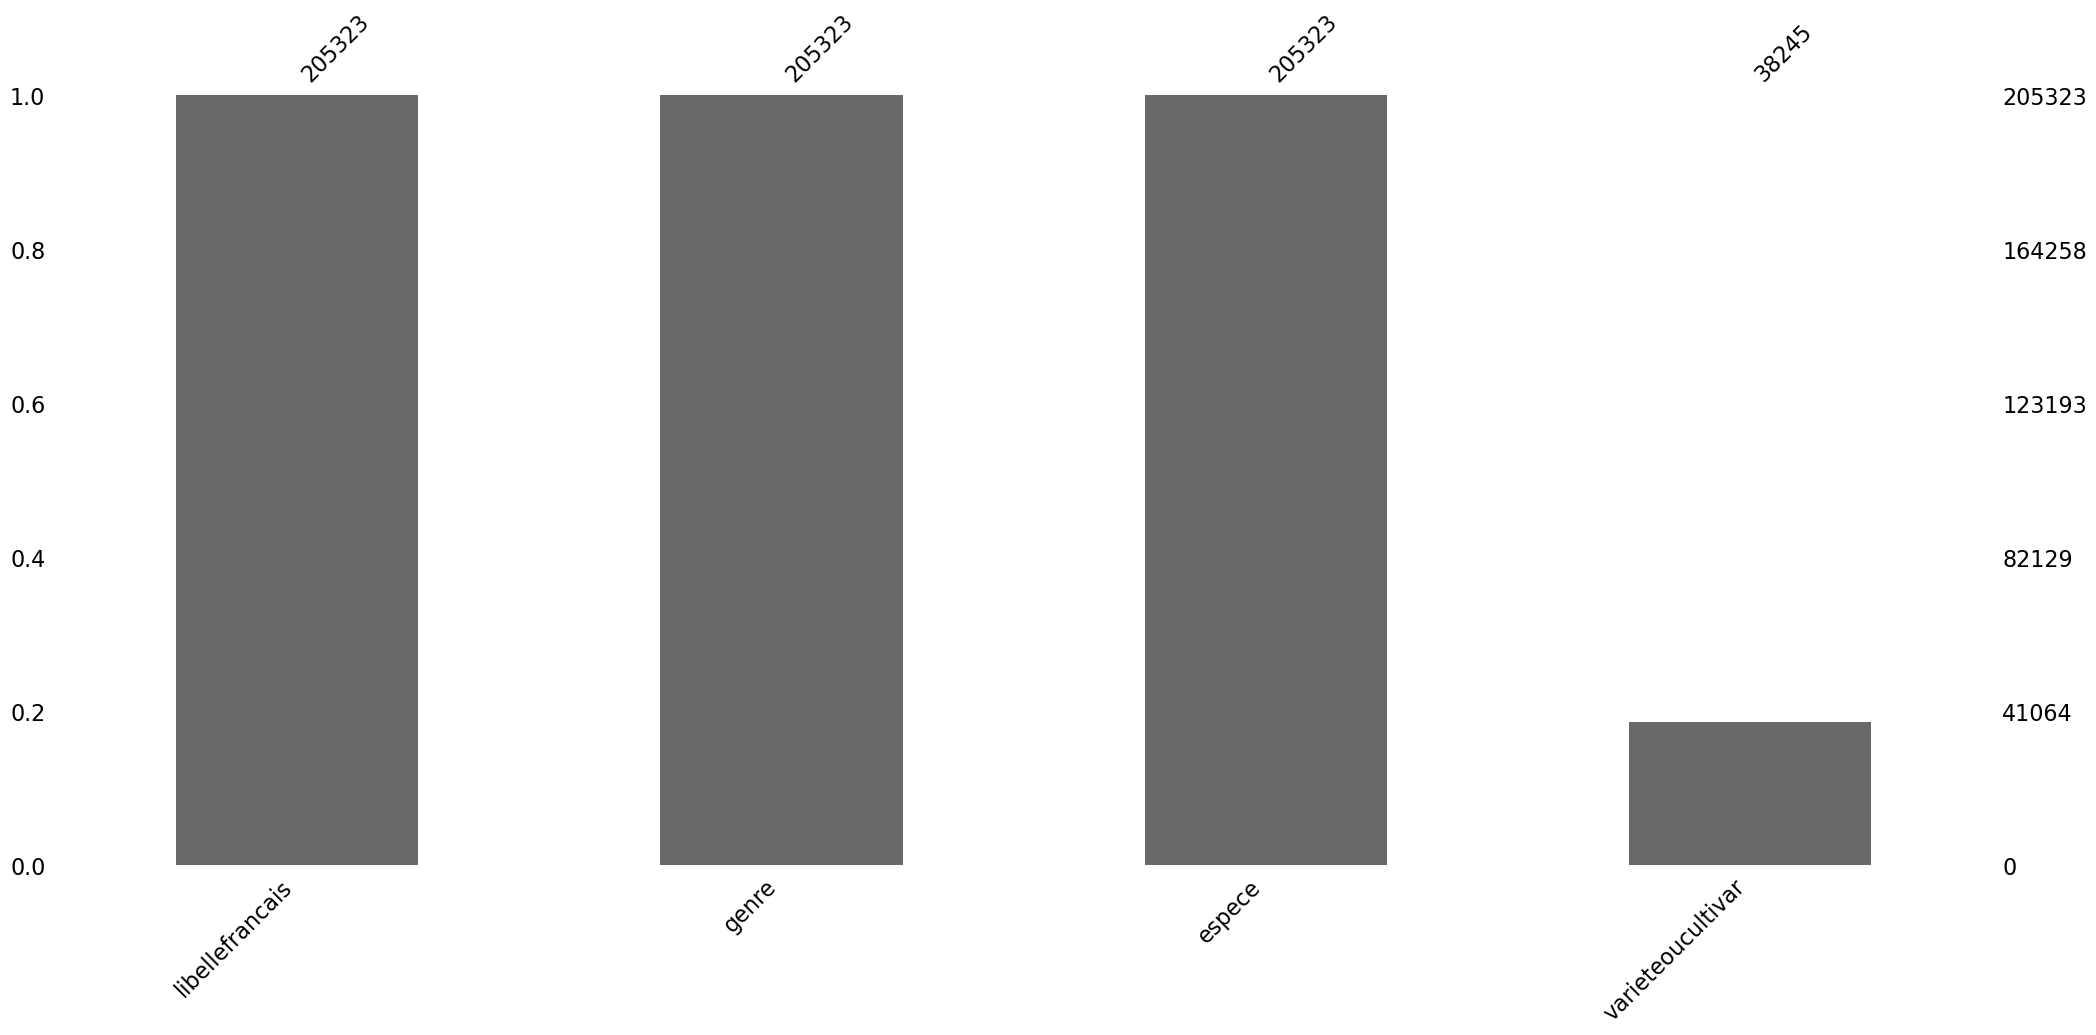

In [24]:
msno.bar(df[['libellefrancais', 'genre', 'espece', 'varieteoucultivar']])

La colonne varieteoucultivar contient beaucoup de valeurs manquantes et ne sera pas utile pour la suite de l'analyse car nous avons assez d'informations sur les types d'arbres avec les colonnes 'libellefrancais', 'genre' et 'espece'.

In [25]:
df = df.drop('varieteoucultivar',axis=1)

## Colonne stadedeveloppement

In [26]:
df['stadedeveloppement'].isna().sum()

45734

In [27]:
df['stadedeveloppement'].describe()

count     159589
unique         4
top       Adulte
freq       77821
Name: stadedeveloppement, dtype: object

In [28]:
df['stadedeveloppement'].value_counts()

stadedeveloppement
Adulte                 77821
Jeune (arbre)Adulte    38036
Jeune (arbre)          36350
Mature                  7382
Name: count, dtype: int64

In [29]:
df.loc[(df['circonferenceencm']!=0),:].groupby('stadedeveloppement')[['circonferenceencm','hauteurenm']].agg(['mean','min','max','median'])

circonferenceencm                  hauteurenm           \
                                 mean min   max median       mean min  max   
stadedeveloppement                                                           
Adulte                     122.170461   1  1650  115.0  12.908091   0  170   
Jeune (arbre)               36.220231   1   448   32.0   5.385010   0   40   
Jeune (arbre)Adulte         67.601005   2   782   65.0   8.355756   0  111   
Mature                     228.603717   2  2015  220.0  19.735450   0  119   

                            
                    median  
stadedeveloppement          
Adulte                12.0  
Jeune (arbre)          5.0  
Jeune (arbre)Adulte    8.0  
Mature                20.0

On remarque un problème de mesure de données. Un arbre qui n'a pas le statut de jeune arbre ne peut pas avoir une circonférence et une hauteur à 0.  

In [30]:
# Je remplace les valeurs des colonnes circonférence et hauteur par la médiane des valeurs classées par stade de développement

# Jeune arbre adulte
df.loc[(df['stadedeveloppement']=='Jeune (arbre)Adulte')&(df['circonferenceencm']==0),'circonferenceencm']=df.loc[df['stadedeveloppement']=='Jeune (arbre)Adulte']['circonferenceencm'].median()
df.loc[(df['stadedeveloppement']=='Jeune (arbre)Adulte')&(df['hauteurenm']==0),'hauteurenm']=df.loc[df['stadedeveloppement']=='Jeune (arbre)Adulte']['hauteurenm'].median()

# Adulte
df.loc[(df['stadedeveloppement']=='Adulte')&(df['circonferenceencm']==0),'circonferenceencm']=df.loc[df['stadedeveloppement']=='Adulte']['circonferenceencm'].median()
df.loc[(df['stadedeveloppement']=='Adulte')&(df['hauteurenm']==0),'hauteurenm']=df.loc[df['stadedeveloppement']=='Adulte']['hauteurenm'].median()

# Mature
df.loc[(df['stadedeveloppement']=='Mature')&(df['circonferenceencm']==0),'circonferenceencm']=df.loc[df['stadedeveloppement']=='Mature']['circonferenceencm'].median()
df.loc[(df['stadedeveloppement']=='Mature')&(df['hauteurenm']==0),'hauteurenm']=df.loc[df['stadedeveloppement']=='Mature']['hauteurenm'].median()

In [31]:
df.groupby('stadedeveloppement')[['circonferenceencm','hauteurenm']].agg(['mean','min','max'])

circonferenceencm           hauteurenm         
                                 mean min   max       mean min  max
stadedeveloppement                                                 
Adulte                     122.159957   1  1650  12.979234   1  170
Jeune (arbre)               36.082724   0   448   5.364842   0   40
Jeune (arbre)Adulte         67.598407   2   782   8.383978   1  111
Mature                     228.590897   2  2015  19.738553   1  119

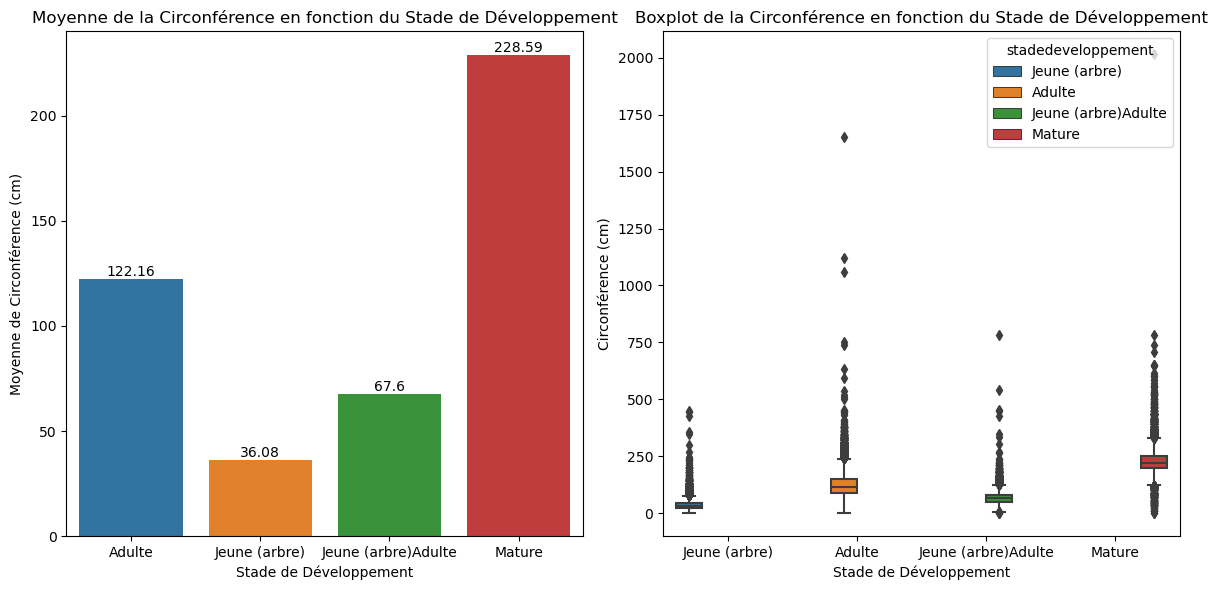

In [32]:
# Créer un subplot avec 1 ligne et 2 colonnes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Graphique 1 : Barplot
sns.barplot(x='stadedeveloppement', y='circonferenceencm', data=round(df.groupby('stadedeveloppement')['circonferenceencm'].mean().reset_index(),2), ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
# Ajoutez des étiquettes au graphique
axes[0].set_title('Moyenne de la Circonférence en fonction du Stade de Développement')
axes[0].set_xlabel('Stade de Développement')
axes[0].set_ylabel('Moyenne de Circonférence (cm)')

# Graphique 2 : Boxplot
sns.boxplot(data=df, x='stadedeveloppement', y='circonferenceencm', hue='stadedeveloppement', ax=axes[1])

# Ajoutez des étiquettes au graphique
axes[1].set_title('Boxplot de la Circonférence en fonction du Stade de Développement')
axes[1].set_ylabel('Circonférence (cm)')
axes[1].set_xlabel('Stade de Développement')

# Ajustez la disposition pour éviter les chevauchements
plt.tight_layout()

# Affichez le subplot
plt.show()

In [33]:
df.loc[df['stadedeveloppement'].isna()][['stadedeveloppement','circonferenceencm','libellefrancais']]

stadedeveloppement  circonferenceencm   libellefrancais
7                    None                 60          Robinier
15                   None                  0             Hêtre
16                   None                  0            Erable
32                   None                  0             Hêtre
36                   None                 20           Platane
...                   ...                ...               ...
208695               None                 84           Tilleul
208702               None                 10  Poirier à fruits
208707               None                 70           Tilleul
208709               None                  0          Tulipier
208710               None                  0           Tilleul

[45734 rows x 3 columns]

In [34]:
df.loc[(df['circonferenceencm'] == 0) & (df['hauteurenm'] == 0) & (df['stadedeveloppement'].isna()),'stadedeveloppement']='Jeune (arbre)'

In [35]:
df.groupby('stadedeveloppement')[['circonferenceencm','hauteurenm']].agg(['median','min','max'])

circonferenceencm           hauteurenm         
                               median min   max     median min  max
stadedeveloppement                                                 
Adulte                          115.0   1  1650       12.0   1  170
Jeune (arbre)                    22.0   0   448        4.0   0   40
Jeune (arbre)Adulte              65.0   2   782        8.0   1  111
Mature                          220.0   2  2015       20.0   1  119

In [36]:
df.loc[(df['stadedeveloppement'].isna())&(df['circonferenceencm']<448),'stadedeveloppement']='Jeune (arbre)';
df.loc[(df['stadedeveloppement'].isna())&(df['circonferenceencm']>448)&(df['circonferenceencm']<782),'stadedeveloppement']='Jeune (arbre)Adulte';
df.loc[(df['stadedeveloppement'].isna())&(df['circonferenceencm']>782)&(df['circonferenceencm']<1650),'stadedeveloppement']='Adulte';
df.loc[(df['stadedeveloppement'].isna())&(df['circonferenceencm']>1650),'stadedeveloppement']='Mature';

In [37]:
df['stadedeveloppement'].value_counts()

stadedeveloppement
Jeune (arbre)          82075
Adulte                 77821
Jeune (arbre)Adulte    38045
Mature                  7382
Name: count, dtype: int64

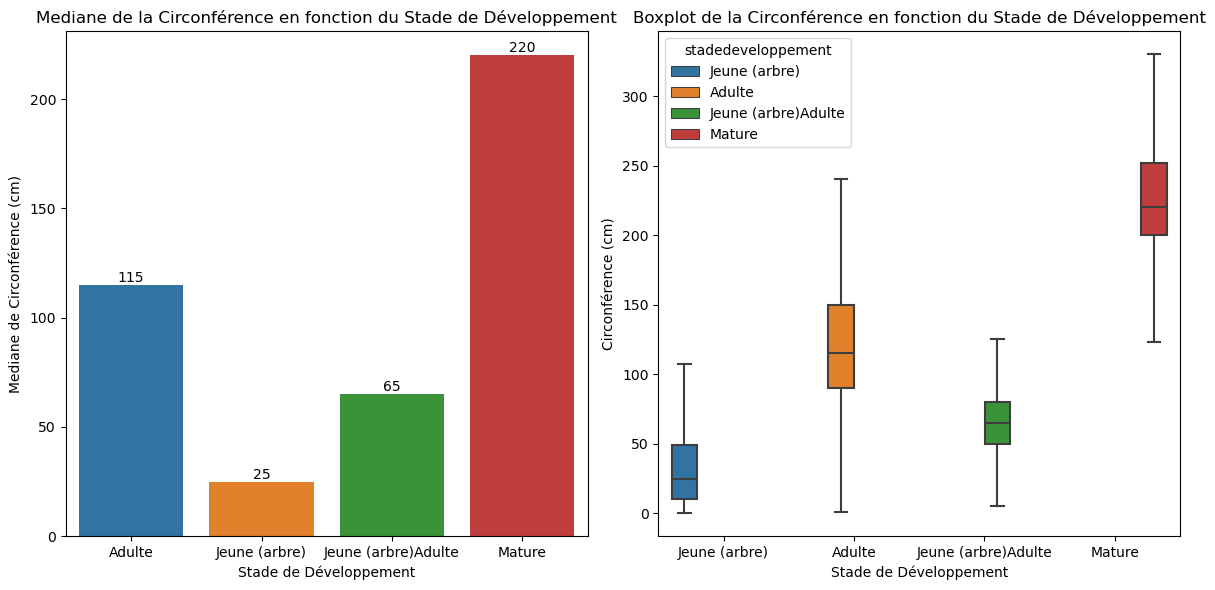

In [38]:
# Créer un subplot avec 1 ligne et 2 colonnes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Graphique 1 : Barplot
sns.barplot(x='stadedeveloppement', y='circonferenceencm', data=round(df.groupby('stadedeveloppement')['circonferenceencm'].median().reset_index(),2), ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
# Ajoutez des étiquettes au graphique
axes[0].set_title('Mediane de la Circonférence en fonction du Stade de Développement')
axes[0].set_xlabel('Stade de Développement')
axes[0].set_ylabel('Mediane de Circonférence (cm)')

# Graphique 2 : Boxplot
sns.boxplot(data=df, x='stadedeveloppement', y='circonferenceencm', hue='stadedeveloppement', ax=axes[1],showfliers=False)

# Ajoutez des étiquettes au graphique
axes[1].set_title('Boxplot de la Circonférence en fonction du Stade de Développement')
axes[1].set_ylabel('Circonférence (cm)')
axes[1].set_xlabel('Stade de Développement')

# Ajustez la disposition pour éviter les chevauchements
plt.tight_layout()

# Affichez le subplot
plt.show()

## colonne remarquable

In [39]:
df['remarquable'].value_counts()

remarquable
NON    184040
OUI       187
Name: count, dtype: int64

In [40]:
df.loc[df['remarquable']=='OUI','stadedeveloppement']='Mature'

In [41]:
df.groupby('stadedeveloppement')['circonferenceencm'].agg(['min','max','count'])

min   max  count
stadedeveloppement                   
Adulte                 1  1650  77768
Jeune (arbre)          0   448  82072
Jeune (arbre)Adulte    2   782  38044
Mature                 2  2015   7439

<Axes: >

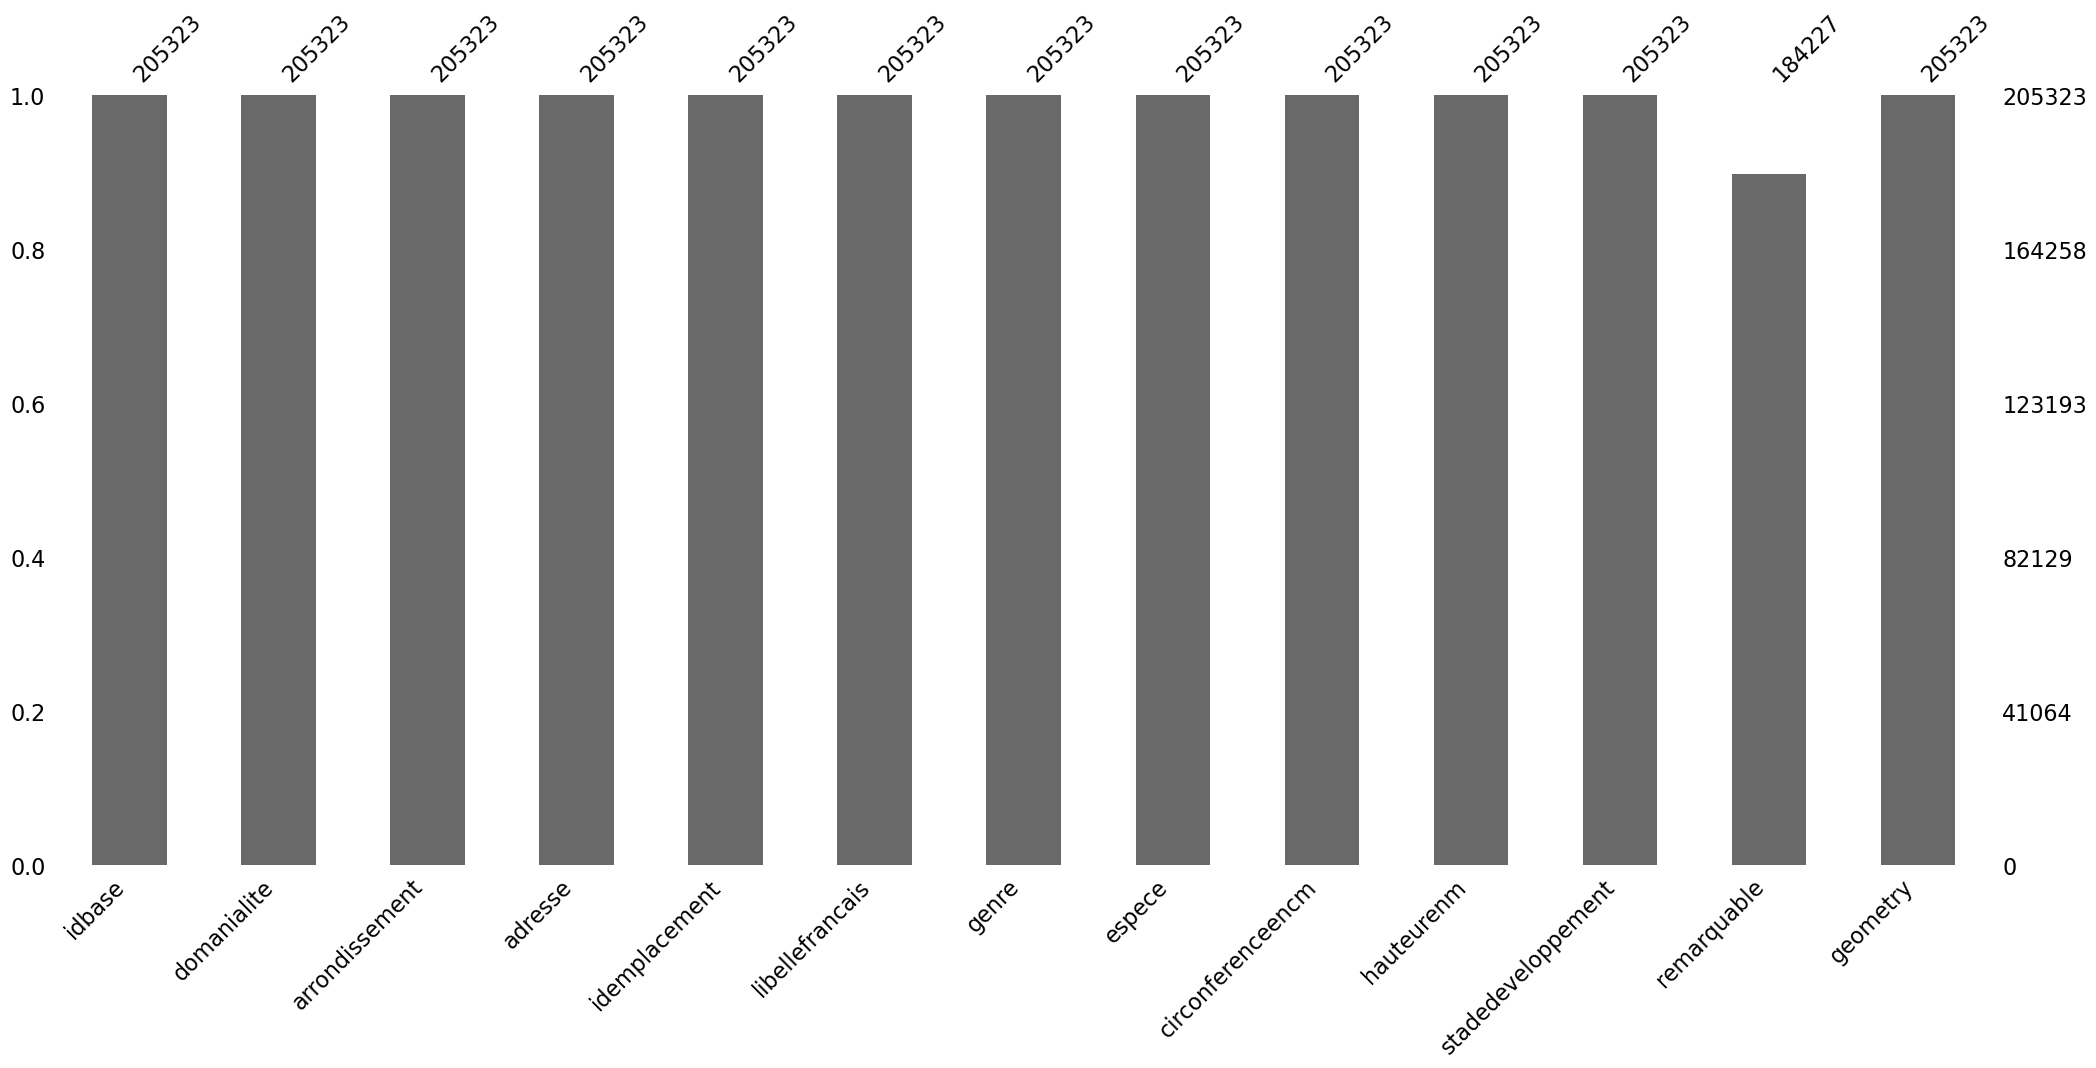

In [42]:
msno.bar(df)

In [43]:
df.loc[(df['remarquable'].isna()) &(df['remarquable']!='NON')]['idbase'].count()

21096

In [44]:
df.loc[(df['remarquable'].isna())&(df['stadedeveloppement']!='Mature'),'remarquable']='NON';
df.loc[(df['remarquable'].isna())&(df['stadedeveloppement']=='Mature'),'remarquable']='OUI'

<Axes: >

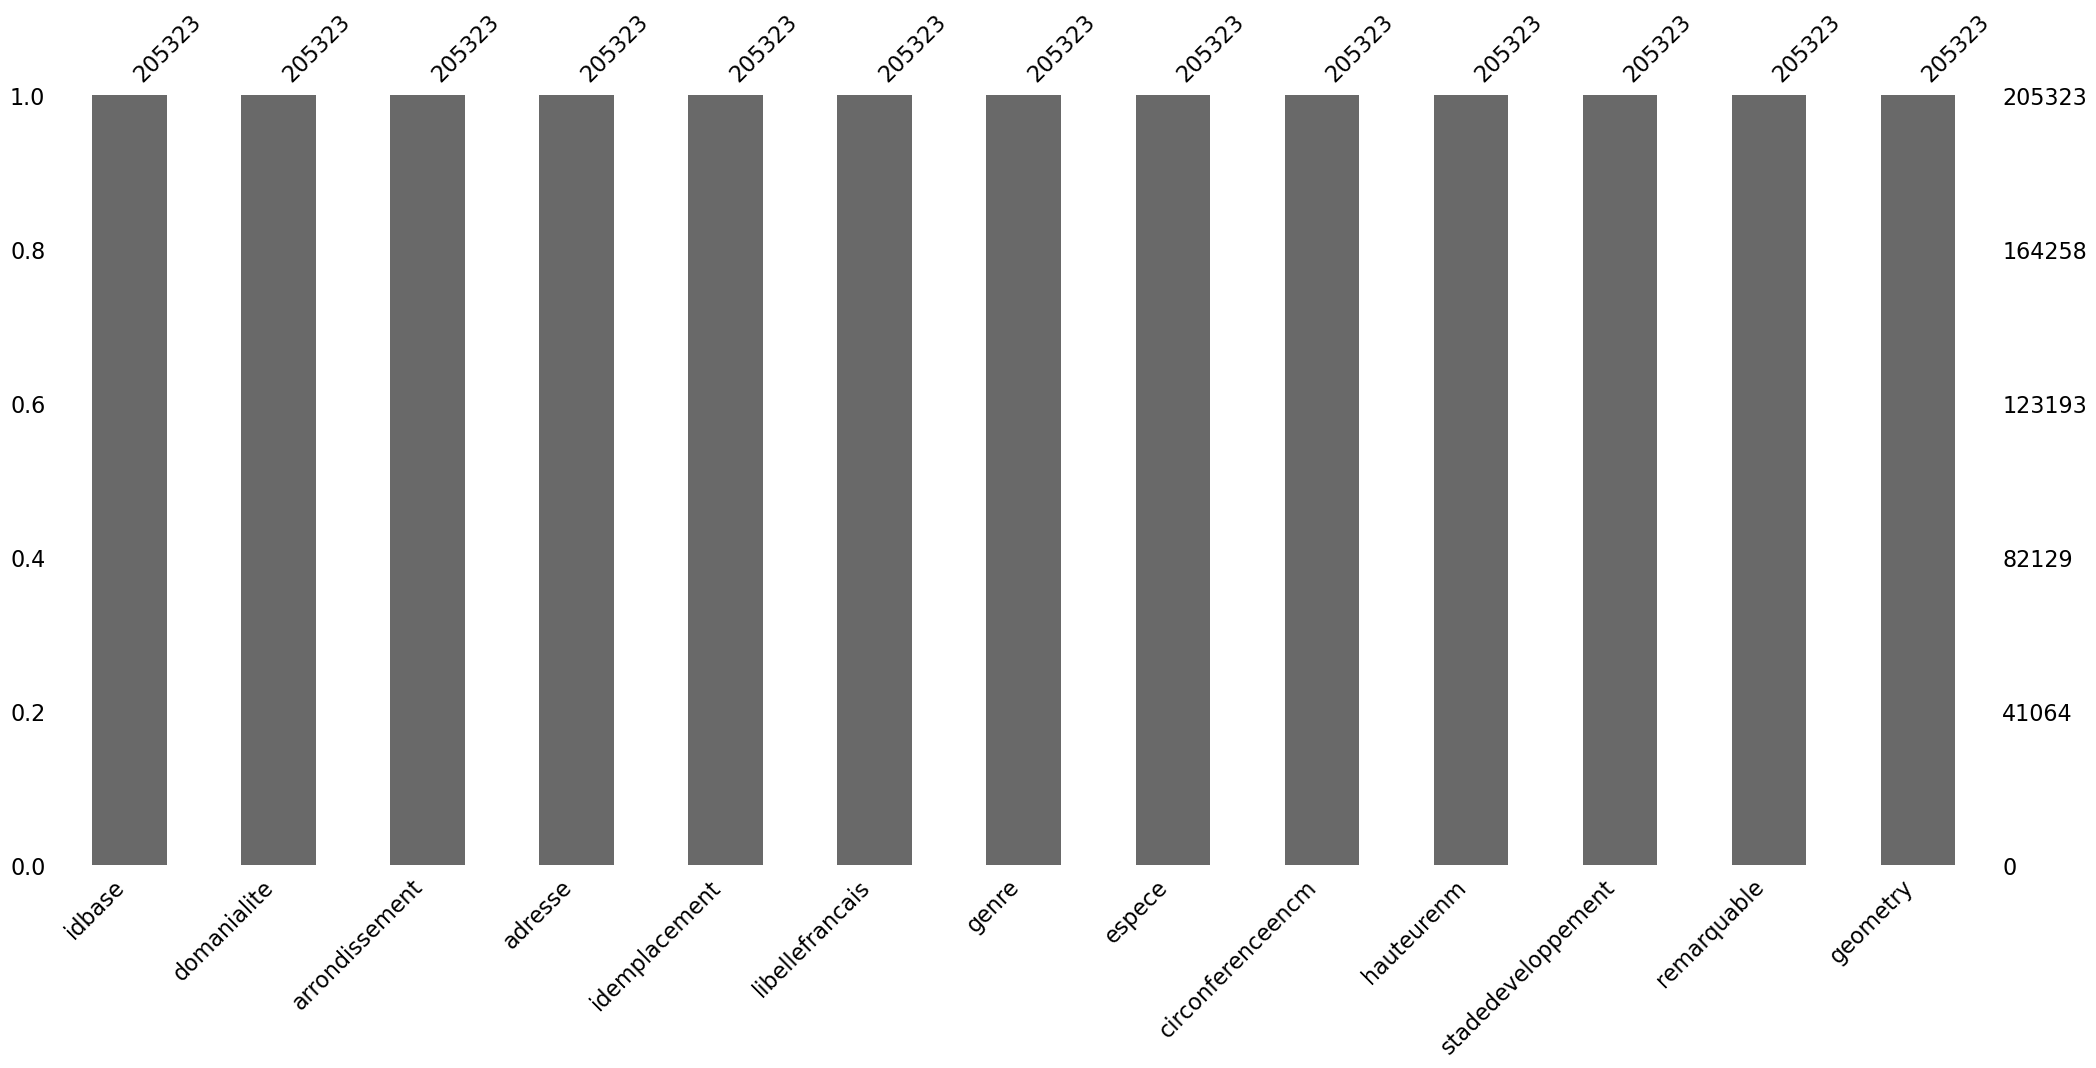

In [45]:
msno.bar(df)

## Analyse univariée 

### Variables quantitatives

In [46]:
df['stadedeveloppement'].unique()

array(['Jeune (arbre)', 'Adulte', 'Jeune (arbre)Adulte', 'Mature'],
      dtype=object)

In [47]:
df.describe()

idbase  circonferenceencm     hauteurenm
count  2.053230e+05      205323.000000  205323.000000
mean   4.928643e+05          81.699795       8.918636
std    6.627548e+05          63.035933       5.915611
min    9.987400e+04           0.000000       0.000000
25%    1.606575e+05          32.000000       5.000000
50%    2.299470e+05          70.000000       8.000000
75%    2.850745e+05         115.000000      12.000000
max    2.043107e+06        2015.000000     170.000000

<Axes: ylabel='Frequency'>

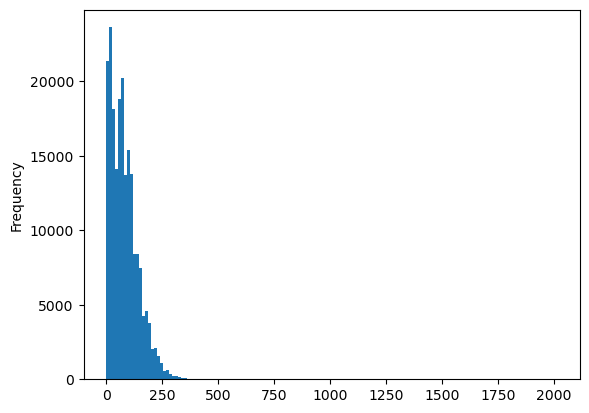

In [48]:
df['circonferenceencm'].plot(kind='hist',bins=150)

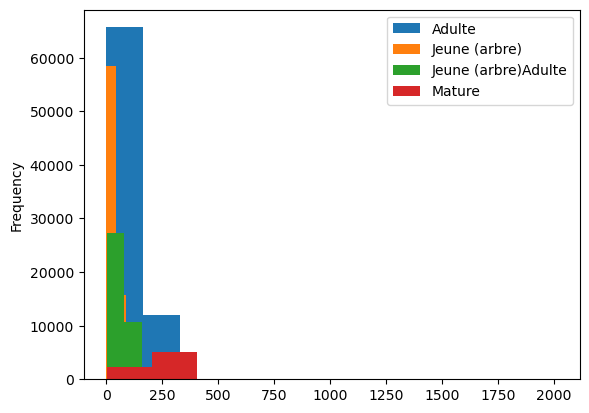

In [49]:
df.groupby('stadedeveloppement')['circonferenceencm'].plot(kind='hist')
plt.legend()
plt.show()

In [50]:
df.groupby('stadedeveloppement')['circonferenceencm'].agg(['min','max','count'])

min   max  count
stadedeveloppement                   
Adulte                 1  1650  77768
Jeune (arbre)          0   448  82072
Jeune (arbre)Adulte    2   782  38044
Mature                 2  2015   7439

In [51]:
df['stadedeveloppement'].value_counts()

stadedeveloppement
Jeune (arbre)          82072
Adulte                 77768
Jeune (arbre)Adulte    38044
Mature                  7439
Name: count, dtype: int64

In [52]:
df.loc[df['circonferenceencm']>1700,:]

idbase domanialite  arrondissement      adresse idemplacement  \
188485  271219  Alignement  PARIS 7E ARRDT  QUAI BRANLY     000204016   

       libellefrancais     genre        espece  circonferenceencm  hauteurenm  \
188485         Platane  Platanus  occidentalis               2015          26   

       stadedeveloppement remarquable                  geometry  
188485             Mature         NON  POINT (2.29977 48.86239)

Partant du principe que l'arbre le plus grand du monde a une circonférence de 31 mètres, je considère que les données de cet arbre sont plausibles mis à part pour la colonne remarquable que je vais modifier par 'OUI'.  

(*https://www.gerbeaud.com/reponses-experts/arbre-le-plus-haut-du-monde,106.html#:~:text=C'est%20un%20s%C3%A9quoia%20g%C3%A9ant,national%20de%20Sequoia%2C%20en%20Californie.&text=tous%20les%20records-,Lire,Sequoia*)

## Préparation de géopandas pour la visualisation des données

In [53]:
df.columns

Index(['idbase', 'domanialite', 'arrondissement', 'adresse', 'idemplacement',
       'libellefrancais', 'genre', 'espece', 'circonferenceencm', 'hauteurenm',
       'stadedeveloppement', 'remarquable', 'geometry'],
      dtype='object')

In [54]:
# Je crée une colonne de géométrie contenant des objets Point en utilisant la longitude et la latitude du jeu de données.
geometry= df['geometry'];
geometry[:3]

0    POINT (2.39702 48.84681)
1    POINT (2.40119 48.87590)
2    POINT (2.28903 48.86010)
Name: geometry, dtype: geometry

In [55]:
df_geo = gpd.GeoDataFrame(df,crs='epsg:4326',geometry=geometry)

Text(0.5, 1.0, 'arrondissement')

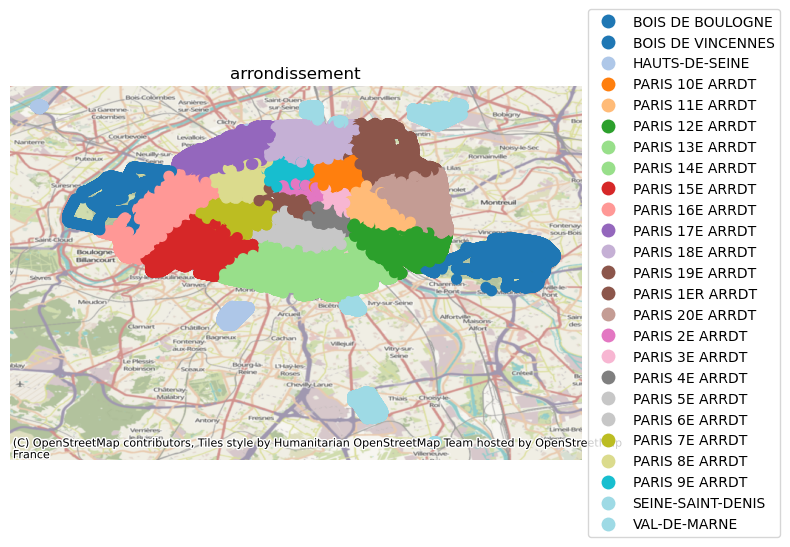

In [56]:
# Initialize our plot
fig, ax = plt.subplots(figsize=(8,10))
# Plot our SF GeoDataFrame
#carte.plot(ax=ax, alpha = .1)
# Plot our Starbucks locations
df_geo.plot(ax=ax, column = 'arrondissement', cmap = 'tab20', marker = 'o', markersize=50,  legend = True,legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
# Add in a background using contextily
ctx.add_basemap(ax, crs=df_geo.crs.to_string())
# Turn off axis
ax.set_axis_off()
fig.tight_layout()
plt.title("arrondissement")

<img src=paris.png width="500" height="200"> <img src=paris_2.jpg width="500" height="200">



In [57]:
genres = df['genre'].value_counts()
genres

genre
Platanus         42532
Aesculus         24822
Tilia            22095
Acer             19401
Styphnolobium    11591
                 ...  
Argyrocytisus        1
Acca                 1
Hemiptelea           1
Taiwania             1
Philadelphus         1
Name: count, Length: 182, dtype: int64

## Analyse de la répartition des arbres en fonction de la dominialité

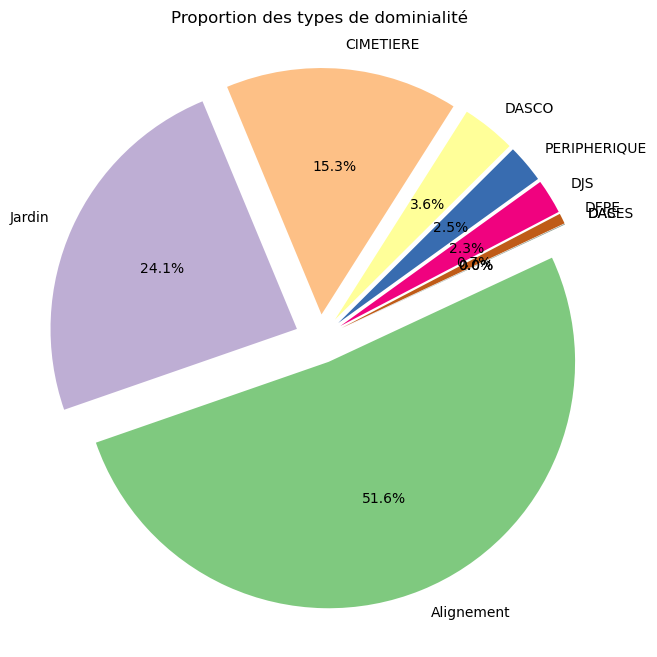

In [105]:
# Compter les occurrences de chaque type de dominialité
domanialite_counts = df['domanialite'].value_counts()

# Calculer le pourcentage de chaque type de dominialité
pourcentages = domanialite_counts / domanialite_counts.sum()

# Définir un espacement pour chaque portion du pie chart
explode_values = [0.1] * len(domanialite_counts)

# Créer un diagramme circulaire avec explode
plt.figure(figsize=(8, 8))  # Ajustez la taille du diagramme selon vos préférences
plt.pie(pourcentages, labels=domanialite_counts.index, autopct='%1.1f%%', startangle=25, counterclock=False, explode=explode_values, colors=plt.cm.Accent.colors)
plt.title('Proportion des types de dominialité')

# Afficher le diagramme
plt.show()

TypeError: object of type 'int' has no len()

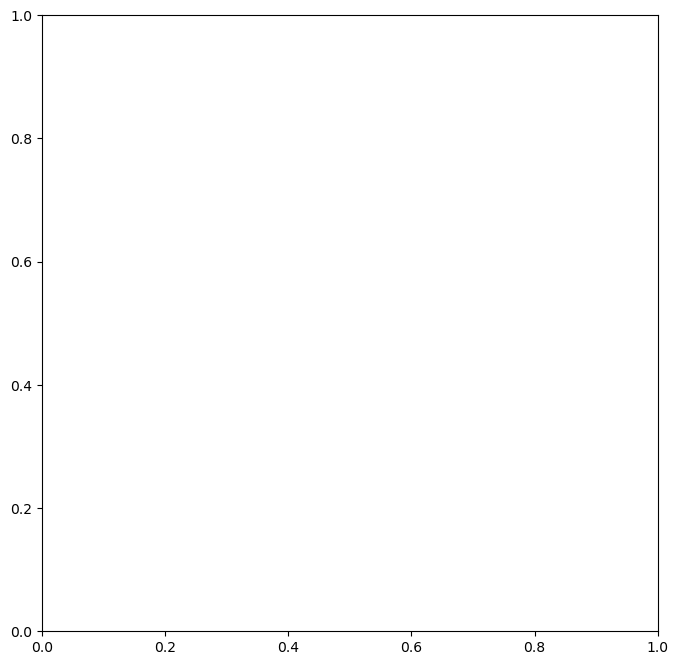

In [97]:
# Compter les occurrences de chaque type de dominialité
domanialite_counts = df['domanialite'].value_counts()

# Créer un diagramme circulaire
plt.figure(figsize=(8, 8))  # Ajustez la taille du diagramme selon vos préférences
plt.pie(domanialite_counts, labels=domanialite_counts.index, autopct='%1.1f%%', startangle=40, colors=plt.cm.Accent.colors)
plt.title('Proportion des types de dominialité')

# Afficher le diagramme
plt.show()

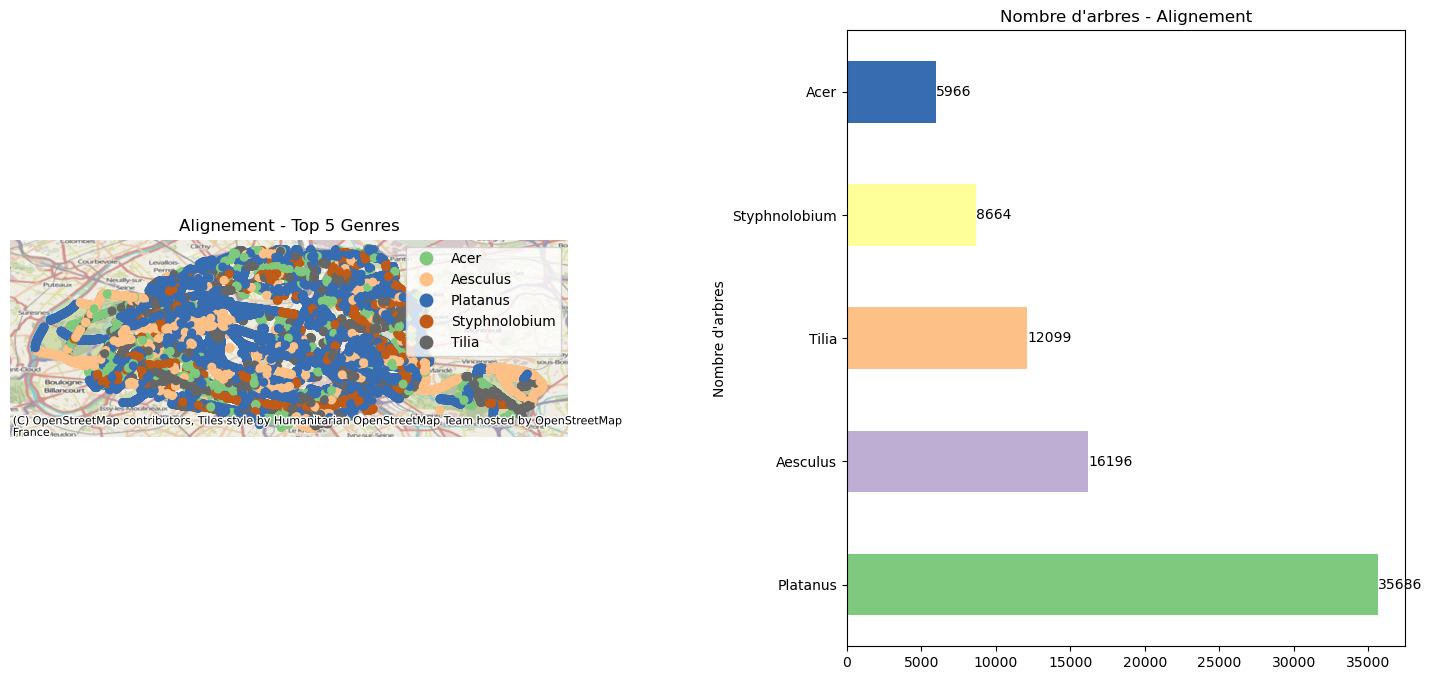

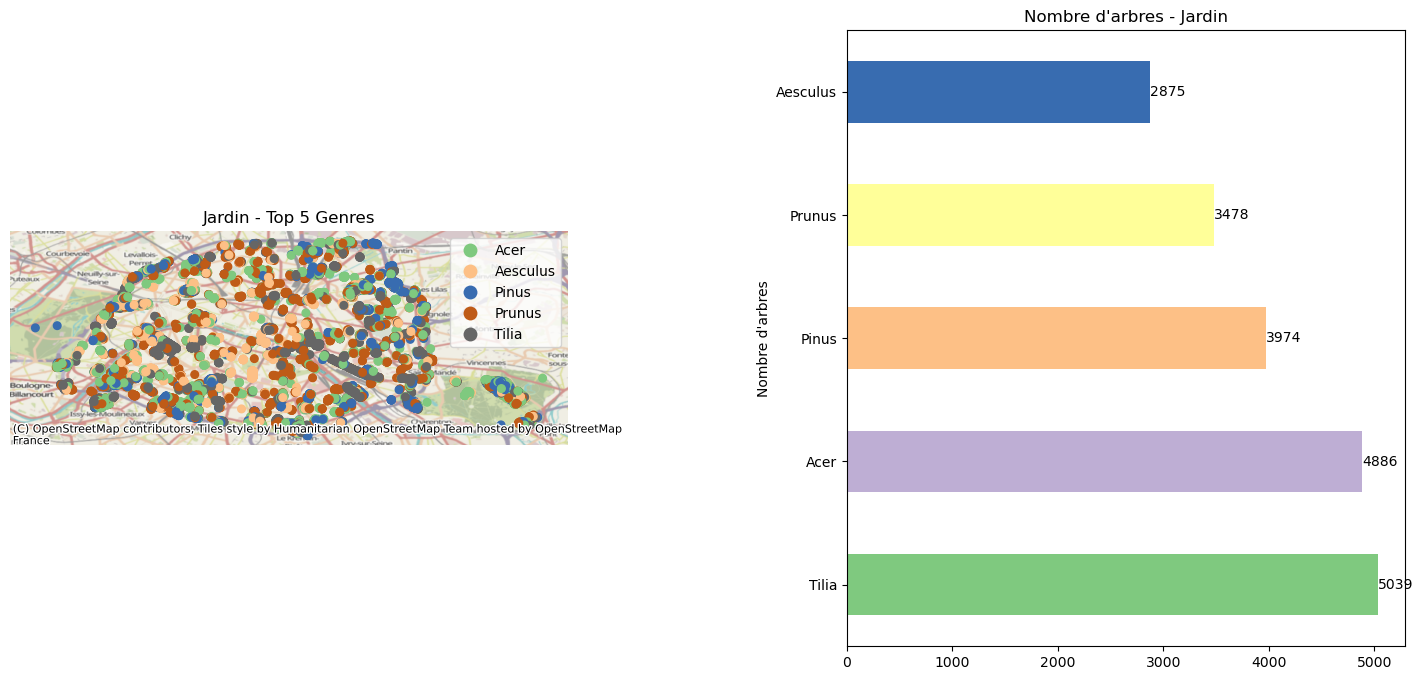

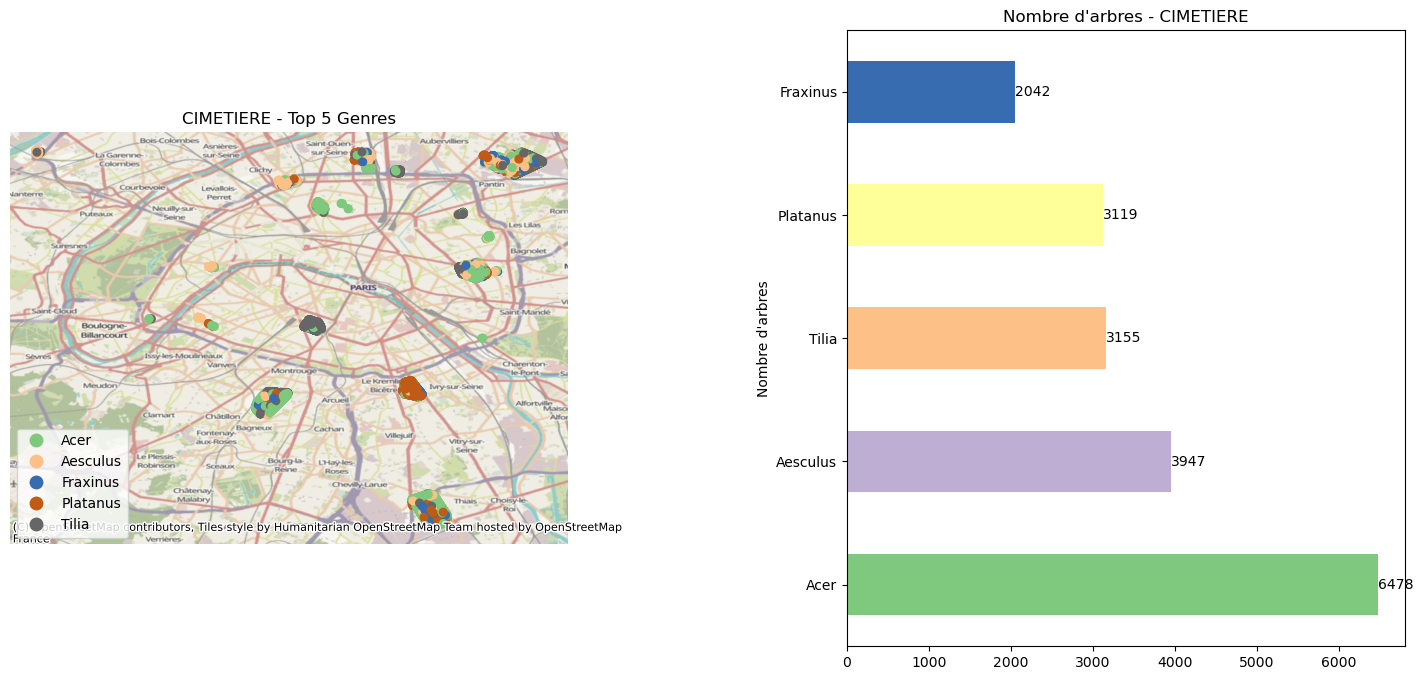

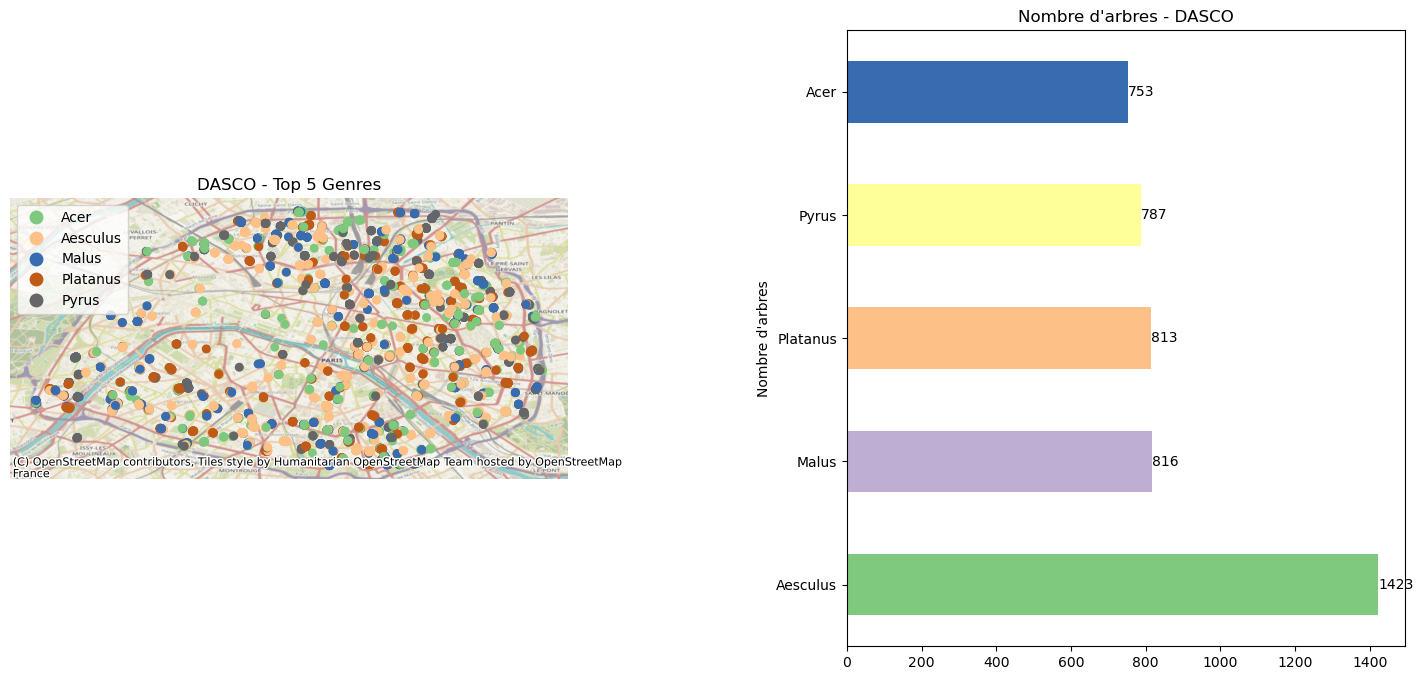

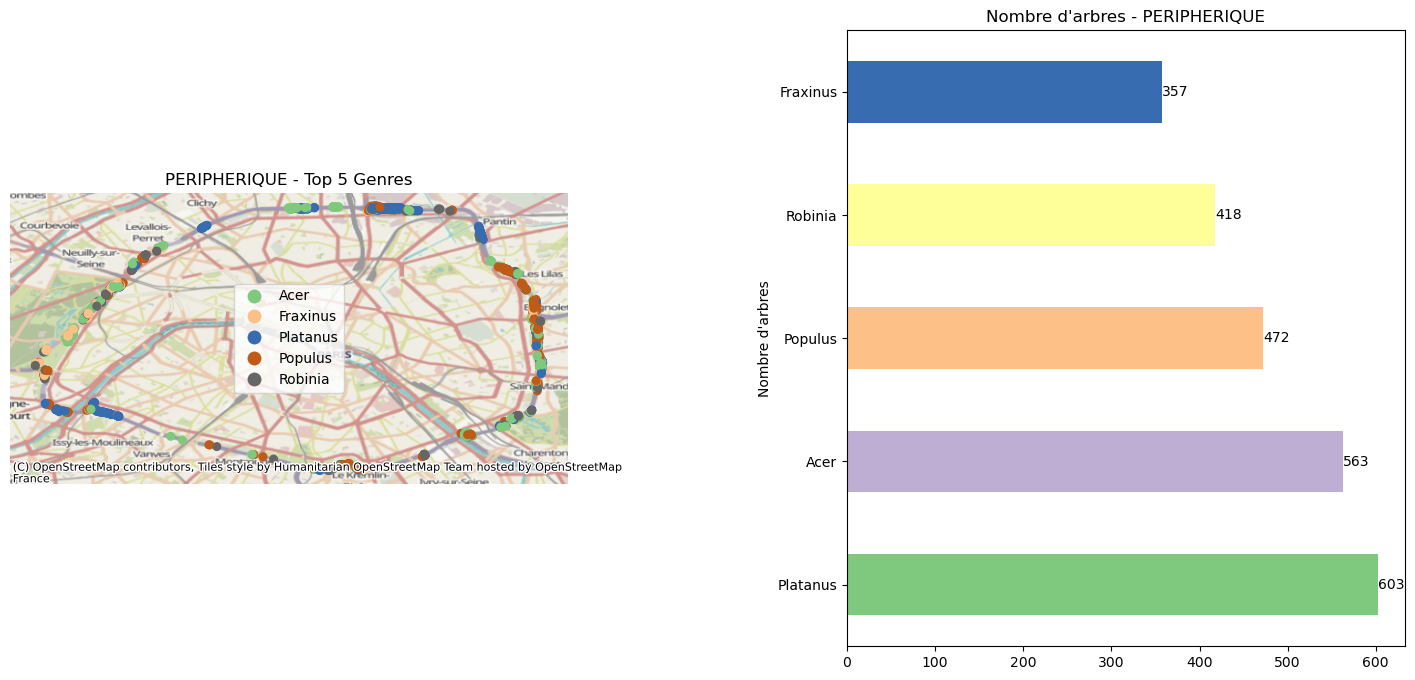

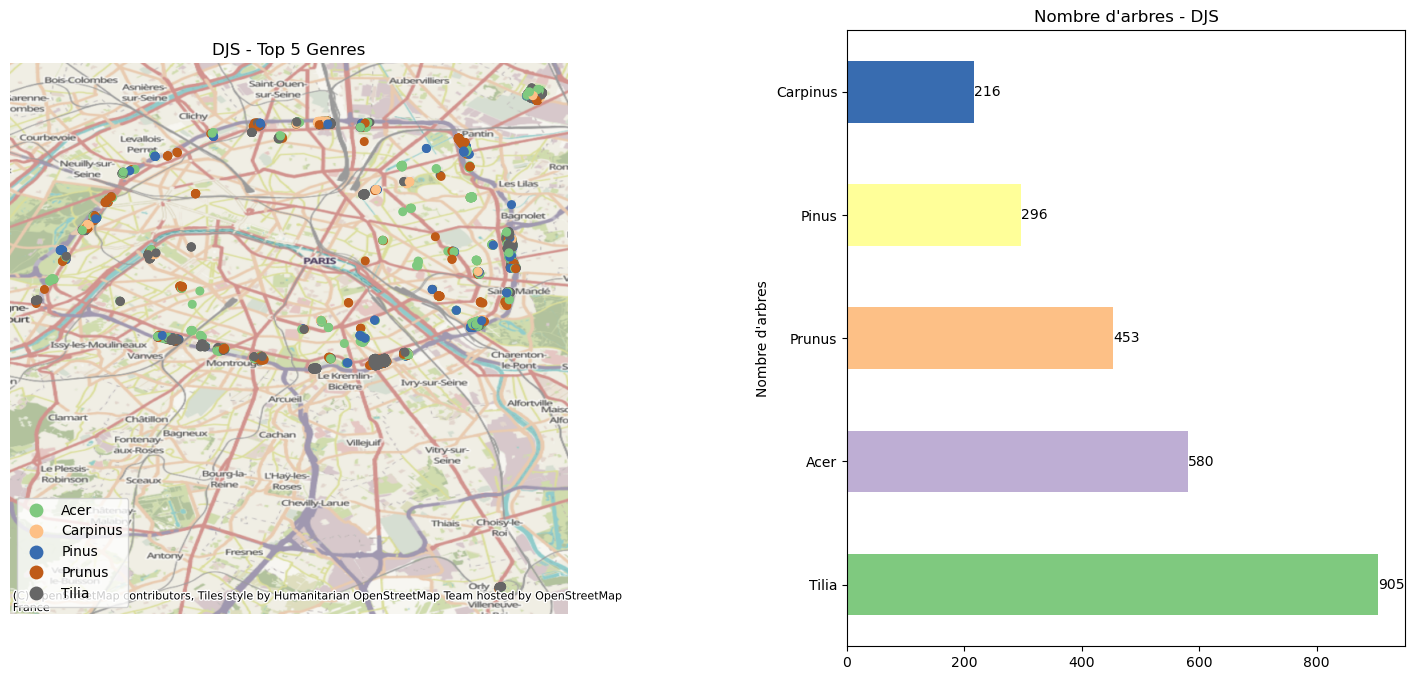

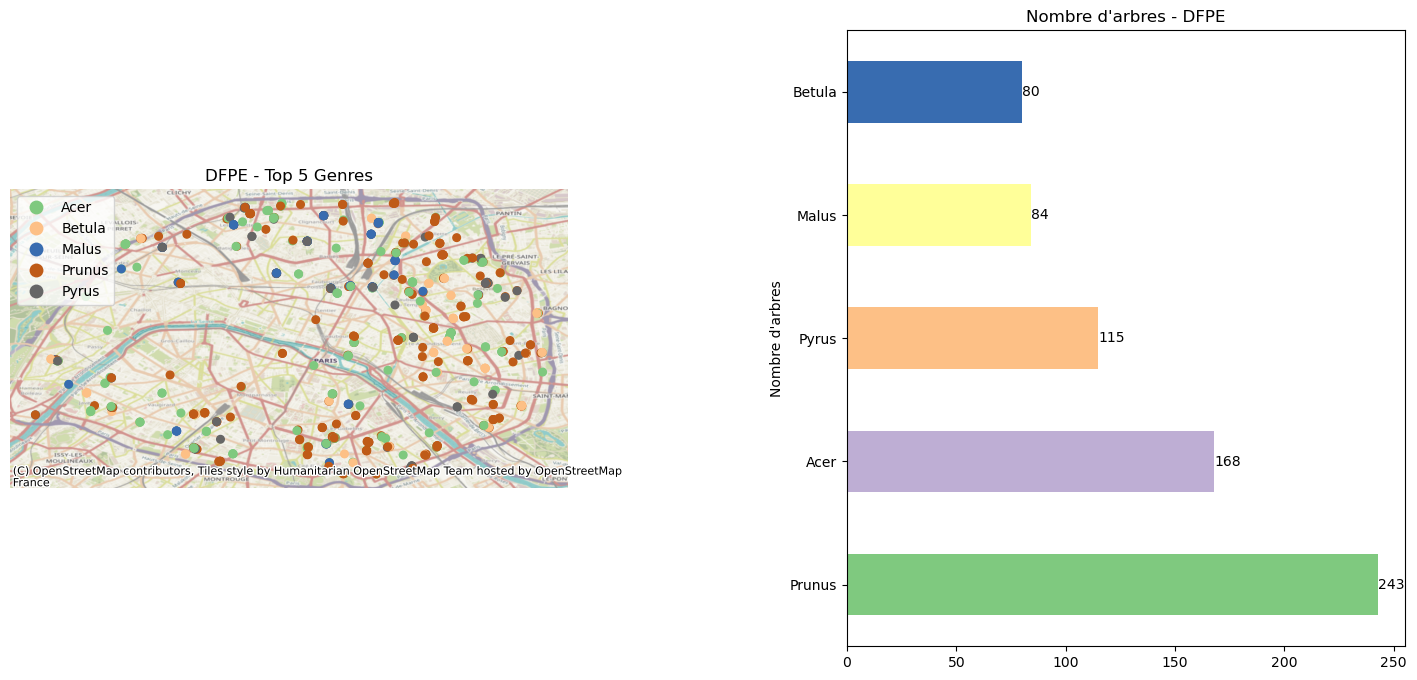

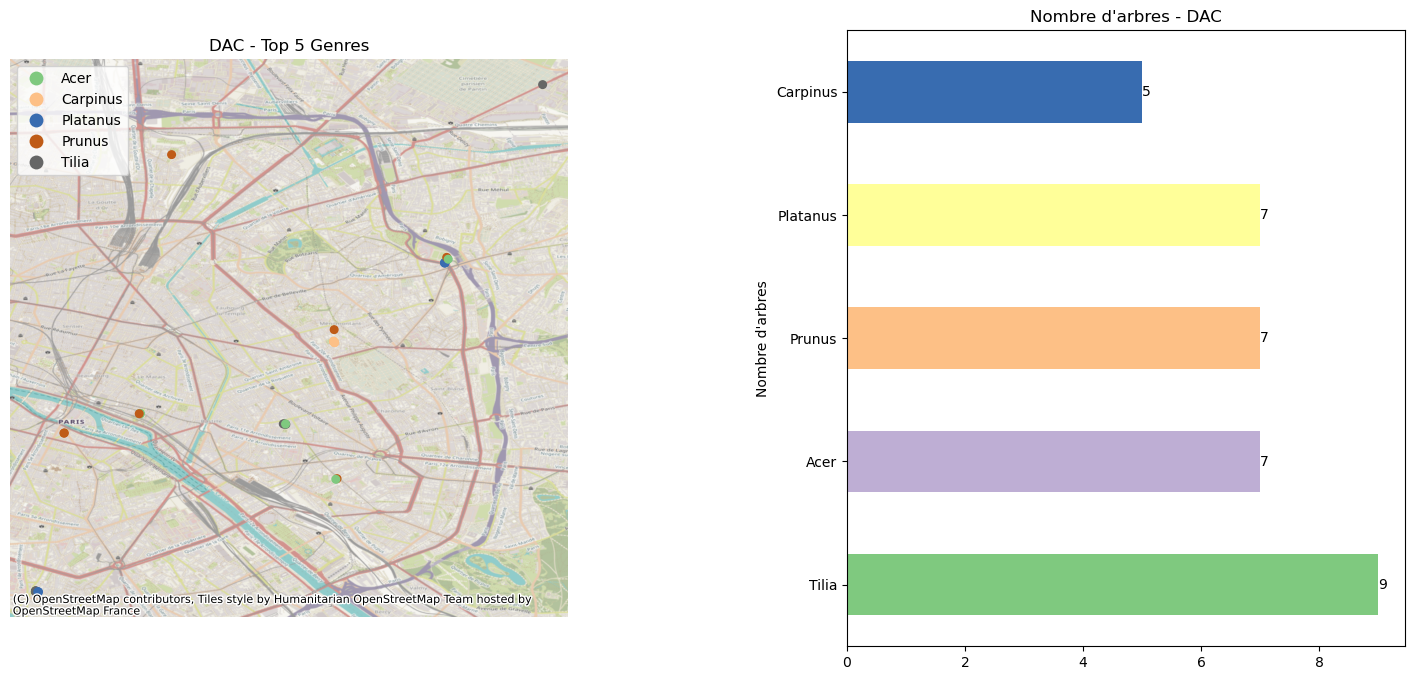

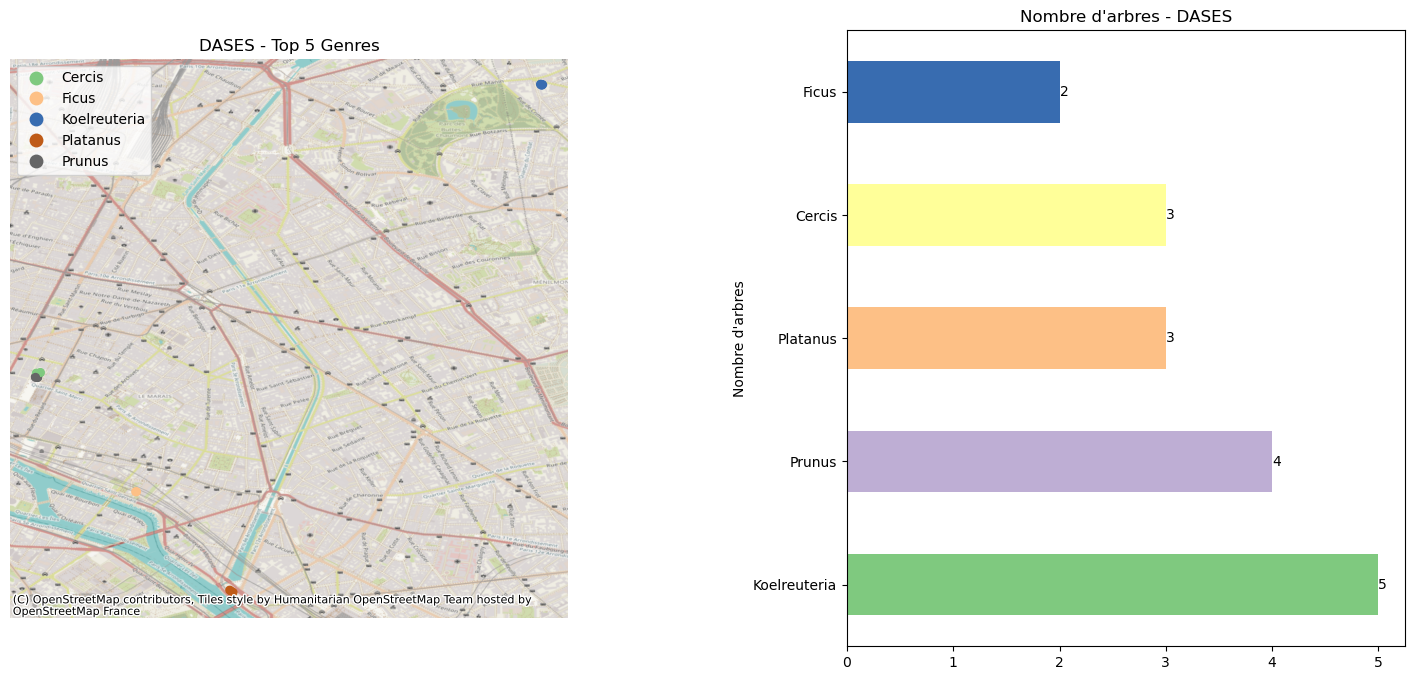

In [68]:
# Obtenez la liste unique des types de dominialité
domanialites = df['domanialite'].unique()

# Parcourez chaque type de dominialité
for domanialite in domanialites:
    # Filtrer les données pour chaque type de dominialité
    filtered_data = df[df['domanialite'] == domanialite]

    # Compter les occurrences des genres
    top_genres = filtered_data['genre'].value_counts().head(5)

    # Filtrer le DataFrame pour les 5 genres les plus courants
    filtered_gdf = filtered_data[filtered_data['genre'].isin(top_genres.index)]

    # Initialize our plot with two subplots (en inversant l'ordre des axes)
    fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(18, 8))

    # Plot a bar chart for the number of trees in the top genres
    top_genres.plot(kind='barh', ax=ax1, color=plt.cm.Accent(range(len(top_genres))))
    ax1.bar_label(ax1.containers[0])
    ax1.set_title(f"Nombre d'arbres - {domanialite}")
    ax1.set_ylabel("Nombre d'arbres")

    # Plot locations with the top genres
    filtered_gdf.plot(ax=ax2, column='genre', cmap='Accent', marker='o', markersize=30, legend=True)

    # Add in a background using contextily
    ctx.add_basemap(ax=ax2, crs=filtered_gdf.crs.to_string())
    plt.subplots_adjust(wspace=0.5)
    # Turn off axis
    ax2.set_axis_off()
    ax2.set_title(f'{domanialite} - Top 5 Genres')

    # Show the plots
    plt.show()

In [59]:
genres = df['genre'].value_counts().head(10)
genres

genre
Platanus         42532
Aesculus         24822
Tilia            22095
Acer             19401
Styphnolobium    11591
Prunus            7755
Fraxinus          6014
Pinus             4995
Quercus           4774
Pyrus             4707
Name: count, dtype: int64

NameError: name 'm' is not defined

In [ ]:
df['domanialite'].value_counts()

Je vais analyser la répartition des arbres en fonction du type de dominialité.

In [ ]:
df_geo.columns

### Alignements

In [ ]:
alignement = df.loc[df['domanialite']=='Alignement',:]

In [ ]:
alignement = df[df['domanialite'] == 'Alignement']

# Compter les occurrences des genres
top_genres = alignement['genre'].value_counts().head(5).index

# Filtrer le DataFrame alignement pour les 10 genres les plus courants
filtered_gdf = alignement[alignement['genre'].isin(top_genres)]

# Initialize our plot with a larger figure size
fig, ax1 = plt.subplots(figsize=(12, 15))

# Plot the Alignement locations with the top genres
filtered_gdf.plot(ax=ax1, column='genre', cmap='Accent', marker='o', markersize=30, legend=True)

# Add in a background using contextily
ctx.add_basemap(ax=ax1, crs=filtered_gdf.crs.to_string())

# Turn off axis
ax1.set_axis_off()
fig.tight_layout()
plt.title('Alignement - Top 5 Genres')
plt.show()

In [ ]:
alignement = df[df['domanialite'] == 'Alignement']
filtered_gdf = alignement

# Initialize our plot
fig, ax1 = plt.subplots(figsize=(8, 10))

# Plot the Alignement locations with the specified genre
filtered_gdf.plot(ax=ax1, column='genre', cmap='tab20', marker='*', markersize=50,legend=True )

ctx.add_basemap(ax=ax1, crs=df_geo.crs.to_string())
#ax1.grid(False)

# Turn off axis
ax.set_axis_off()
fig.tight_layout()
plt.title('Alignement')
plt.show()

In [ ]:
# Initialize our plot
fig, ax = plt.subplots(figsize=(8,10))
# Plot our SF GeoDataFrame
#carte.plot(ax=ax, alpha = .1)
# Plot our Starbucks locations
alignement.plot(ax=ax, column = 'genre', cmap = 'tab20', marker = '*', markersize=50,  legend = True,legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
# Add in a background using contextily
ctx.add_basemap(ax, crs=df_geo.crs.to_string())
# Turn off axis
ax.set_axis_off()
fig.tight_layout()
plt.title("périphérie")
plt.show()

In [ ]:
df.loc[df['domanialite']=='Alignement',:]